In [1]:
import l2f_tda as tda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn import ensemble

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
%matplotlib inline

Using TensorFlow backend.


In [2]:
import pickle as pkl
filteredSeries = pkl.load(open('example_filtered_time_series.pkl', 'rb'))
embeddedRegime = pkl.load(open('example_embedded_regime.pkl', 'rb'))

In [3]:
labeller = tda.LorenzLabeller()
labeller.fit(embeddedRegime)

LorenzLabeller()

In [4]:
labels = labeller.transform(embeddedRegime)
print(labels.shape)
print(labels)

(1241, 2)
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [5]:
from importlib import reload

import l2f_tda as tda
reload(tda)
import keras
import tensorflow as tf

config = tf.ConfigProto( device_count = {'GPU': 1} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [6]:
from keras.models import Sequential
import keras.layers as klayers
import keras.optimizers as koptimizers
from keras.wrappers.scikit_learn import KerasRegressor

In [7]:
numberStepsInPast = 20
stepInFuture = 5

embeddedEstimatorSteps = [ {'layer': klayers.LSTM, 'units': 5, 'activation': 'tanh'},
                           {'layer': klayers.Dense, 'units': 1, 'activation': 'sigmoid'} ]

embeddedEstimator_kwargs = { 'optimizer': koptimizers.Adadelta }
embeddedEstimatorFit_kwargs = {'epochs': 10000, 'batch_size': 50, 'verbose': 2}

estimator = tda.CentroidsDistanceEstimator(numberStepsInPast=numberStepsInPast, stepInFuture=stepInFuture,
                                           estimatorSteps=embeddedEstimatorSteps, estimator_kwargs=embeddedEstimator_kwargs,
                                           estimatorFit_kwargs=embeddedEstimatorFit_kwargs)

In [8]:
numberTrain = 1000 + numberStepsInPast + stepInFuture - 1
trainX = filteredSeries[:numberTrain]
trainY = labels[:numberTrain]

In [9]:
estimator.fit(trainX, trainY)

Epoch 1/10000
 - 2s - loss: 0.7224 - acc: 0.2450
Epoch 2/10000
 - 1s - loss: 0.7222 - acc: 0.2450
Epoch 3/10000
 - 1s - loss: 0.7221 - acc: 0.2450
Epoch 4/10000
 - 1s - loss: 0.7220 - acc: 0.2450
Epoch 5/10000
 - 1s - loss: 0.7219 - acc: 0.2450
Epoch 6/10000
 - 1s - loss: 0.7218 - acc: 0.2450
Epoch 7/10000
 - 1s - loss: 0.7216 - acc: 0.2450
Epoch 8/10000
 - 1s - loss: 0.7215 - acc: 0.2450
Epoch 9/10000
 - 1s - loss: 0.7214 - acc: 0.2450
Epoch 10/10000
 - 1s - loss: 0.7213 - acc: 0.2450
Epoch 11/10000
 - 1s - loss: 0.7212 - acc: 0.2450
Epoch 12/10000
 - 1s - loss: 0.7210 - acc: 0.2450
Epoch 13/10000
 - 1s - loss: 0.7209 - acc: 0.2450
Epoch 14/10000
 - 1s - loss: 0.7208 - acc: 0.2450
Epoch 15/10000
 - 1s - loss: 0.7207 - acc: 0.2460
Epoch 16/10000
 - 1s - loss: 0.7205 - acc: 0.2460
Epoch 17/10000
 - 1s - loss: 0.7204 - acc: 0.2470
Epoch 18/10000
 - 1s - loss: 0.7203 - acc: 0.2480
Epoch 19/10000
 - 1s - loss: 0.7202 - acc: 0.2480
Epoch 20/10000
 - 1s - loss: 0.7201 - acc: 0.2480
Epoch 21/

Epoch 164/10000
 - 1s - loss: 0.7029 - acc: 0.3360
Epoch 165/10000
 - 1s - loss: 0.7028 - acc: 0.3370
Epoch 166/10000
 - 1s - loss: 0.7027 - acc: 0.3400
Epoch 167/10000
 - 1s - loss: 0.7026 - acc: 0.3440
Epoch 168/10000
 - 1s - loss: 0.7025 - acc: 0.3440
Epoch 169/10000
 - 1s - loss: 0.7024 - acc: 0.3450
Epoch 170/10000
 - 1s - loss: 0.7022 - acc: 0.3450
Epoch 171/10000
 - 1s - loss: 0.7021 - acc: 0.3460
Epoch 172/10000
 - 1s - loss: 0.7020 - acc: 0.3470
Epoch 173/10000
 - 1s - loss: 0.7019 - acc: 0.3470
Epoch 174/10000
 - 1s - loss: 0.7018 - acc: 0.3480
Epoch 175/10000
 - 1s - loss: 0.7017 - acc: 0.3490
Epoch 176/10000
 - 1s - loss: 0.7016 - acc: 0.3500
Epoch 177/10000
 - 1s - loss: 0.7015 - acc: 0.3550
Epoch 178/10000
 - 1s - loss: 0.7013 - acc: 0.3590
Epoch 179/10000
 - 1s - loss: 0.7012 - acc: 0.3590
Epoch 180/10000
 - 1s - loss: 0.7011 - acc: 0.3600
Epoch 181/10000
 - 1s - loss: 0.7010 - acc: 0.3610
Epoch 182/10000
 - 1s - loss: 0.7009 - acc: 0.3620
Epoch 183/10000
 - 1s - loss: 0

Epoch 325/10000
 - 1s - loss: 0.6848 - acc: 0.3700
Epoch 326/10000
 - 1s - loss: 0.6847 - acc: 0.3700
Epoch 327/10000
 - 1s - loss: 0.6846 - acc: 0.3700
Epoch 328/10000
 - 1s - loss: 0.6845 - acc: 0.3700
Epoch 329/10000
 - 1s - loss: 0.6844 - acc: 0.3700
Epoch 330/10000
 - 1s - loss: 0.6843 - acc: 0.3700
Epoch 331/10000
 - 1s - loss: 0.6841 - acc: 0.3700
Epoch 332/10000
 - 1s - loss: 0.6840 - acc: 0.3700
Epoch 333/10000
 - 1s - loss: 0.6839 - acc: 0.3700
Epoch 334/10000
 - 1s - loss: 0.6838 - acc: 0.3700
Epoch 335/10000
 - 1s - loss: 0.6837 - acc: 0.3700
Epoch 336/10000
 - 1s - loss: 0.6835 - acc: 0.3700
Epoch 337/10000
 - 1s - loss: 0.6834 - acc: 0.3700
Epoch 338/10000
 - 1s - loss: 0.6833 - acc: 0.3700
Epoch 339/10000
 - 1s - loss: 0.6832 - acc: 0.3700
Epoch 340/10000
 - 1s - loss: 0.6830 - acc: 0.3700
Epoch 341/10000
 - 1s - loss: 0.6829 - acc: 0.3700
Epoch 342/10000
 - 1s - loss: 0.6828 - acc: 0.3700
Epoch 343/10000
 - 1s - loss: 0.6827 - acc: 0.3700
Epoch 344/10000
 - 1s - loss: 0

Epoch 486/10000
 - 1s - loss: 0.6606 - acc: 0.4120
Epoch 487/10000
 - 1s - loss: 0.6605 - acc: 0.4120
Epoch 488/10000
 - 1s - loss: 0.6603 - acc: 0.4120
Epoch 489/10000
 - 1s - loss: 0.6602 - acc: 0.4120
Epoch 490/10000
 - 1s - loss: 0.6601 - acc: 0.4120
Epoch 491/10000
 - 1s - loss: 0.6599 - acc: 0.4120
Epoch 492/10000
 - 1s - loss: 0.6598 - acc: 0.4120
Epoch 493/10000
 - 1s - loss: 0.6596 - acc: 0.4120
Epoch 494/10000
 - 1s - loss: 0.6595 - acc: 0.4120
Epoch 495/10000
 - 1s - loss: 0.6594 - acc: 0.4120
Epoch 496/10000
 - 1s - loss: 0.6592 - acc: 0.4120
Epoch 497/10000
 - 1s - loss: 0.6591 - acc: 0.4120
Epoch 498/10000
 - 1s - loss: 0.6590 - acc: 0.4120
Epoch 499/10000
 - 1s - loss: 0.6588 - acc: 0.4130
Epoch 500/10000
 - 1s - loss: 0.6587 - acc: 0.4120
Epoch 501/10000
 - 1s - loss: 0.6586 - acc: 0.4120
Epoch 502/10000
 - 1s - loss: 0.6584 - acc: 0.4110
Epoch 503/10000
 - 1s - loss: 0.6583 - acc: 0.4110
Epoch 504/10000
 - 1s - loss: 0.6582 - acc: 0.4110
Epoch 505/10000
 - 1s - loss: 0

Epoch 647/10000
 - 1s - loss: 0.6386 - acc: 0.4240
Epoch 648/10000
 - 1s - loss: 0.6385 - acc: 0.4240
Epoch 649/10000
 - 1s - loss: 0.6383 - acc: 0.4240
Epoch 650/10000
 - 1s - loss: 0.6382 - acc: 0.4240
Epoch 651/10000
 - 1s - loss: 0.6380 - acc: 0.4240
Epoch 652/10000
 - 1s - loss: 0.6379 - acc: 0.4240
Epoch 653/10000
 - 1s - loss: 0.6377 - acc: 0.4240
Epoch 654/10000
 - 1s - loss: 0.6376 - acc: 0.4240
Epoch 655/10000
 - 1s - loss: 0.6374 - acc: 0.4240
Epoch 656/10000
 - 1s - loss: 0.6373 - acc: 0.4250
Epoch 657/10000
 - 1s - loss: 0.6371 - acc: 0.4230
Epoch 658/10000
 - 1s - loss: 0.6370 - acc: 0.4240
Epoch 659/10000
 - 1s - loss: 0.6368 - acc: 0.4240
Epoch 660/10000
 - 1s - loss: 0.6367 - acc: 0.4240
Epoch 661/10000
 - 1s - loss: 0.6365 - acc: 0.4240
Epoch 662/10000
 - 1s - loss: 0.6363 - acc: 0.4240
Epoch 663/10000
 - 1s - loss: 0.6362 - acc: 0.4240
Epoch 664/10000
 - 1s - loss: 0.6360 - acc: 0.4250
Epoch 665/10000
 - 1s - loss: 0.6359 - acc: 0.4250
Epoch 666/10000
 - 1s - loss: 0

Epoch 808/10000
 - 1s - loss: 0.6123 - acc: 0.4450
Epoch 809/10000
 - 1s - loss: 0.6121 - acc: 0.4450
Epoch 810/10000
 - 1s - loss: 0.6120 - acc: 0.4450
Epoch 811/10000
 - 1s - loss: 0.6118 - acc: 0.4450
Epoch 812/10000
 - 1s - loss: 0.6116 - acc: 0.4450
Epoch 813/10000
 - 1s - loss: 0.6115 - acc: 0.4450
Epoch 814/10000
 - 1s - loss: 0.6113 - acc: 0.4450
Epoch 815/10000
 - 1s - loss: 0.6112 - acc: 0.4450
Epoch 816/10000
 - 1s - loss: 0.6110 - acc: 0.4450
Epoch 817/10000
 - 1s - loss: 0.6108 - acc: 0.4450
Epoch 818/10000
 - 1s - loss: 0.6107 - acc: 0.4450
Epoch 819/10000
 - 1s - loss: 0.6105 - acc: 0.4450
Epoch 820/10000
 - 1s - loss: 0.6104 - acc: 0.4450
Epoch 821/10000
 - 1s - loss: 0.6102 - acc: 0.4450
Epoch 822/10000
 - 1s - loss: 0.6100 - acc: 0.4450
Epoch 823/10000
 - 1s - loss: 0.6099 - acc: 0.4450
Epoch 824/10000
 - 1s - loss: 0.6097 - acc: 0.4450
Epoch 825/10000
 - 1s - loss: 0.6095 - acc: 0.4450
Epoch 826/10000
 - 1s - loss: 0.6094 - acc: 0.4450
Epoch 827/10000
 - 1s - loss: 0

Epoch 969/10000
 - 1s - loss: 0.5912 - acc: 0.4560
Epoch 970/10000
 - 1s - loss: 0.5911 - acc: 0.4560
Epoch 971/10000
 - 1s - loss: 0.5910 - acc: 0.4560
Epoch 972/10000
 - 1s - loss: 0.5909 - acc: 0.4560
Epoch 973/10000
 - 1s - loss: 0.5908 - acc: 0.4560
Epoch 974/10000
 - 1s - loss: 0.5907 - acc: 0.4560
Epoch 975/10000
 - 1s - loss: 0.5906 - acc: 0.4560
Epoch 976/10000
 - 1s - loss: 0.5905 - acc: 0.4560
Epoch 977/10000
 - 1s - loss: 0.5905 - acc: 0.4560
Epoch 978/10000
 - 1s - loss: 0.5904 - acc: 0.4560
Epoch 979/10000
 - 1s - loss: 0.5903 - acc: 0.4550
Epoch 980/10000
 - 1s - loss: 0.5902 - acc: 0.4550
Epoch 981/10000
 - 1s - loss: 0.5901 - acc: 0.4550
Epoch 982/10000
 - 1s - loss: 0.5900 - acc: 0.4550
Epoch 983/10000
 - 1s - loss: 0.5899 - acc: 0.4550
Epoch 984/10000
 - 1s - loss: 0.5899 - acc: 0.4550
Epoch 985/10000
 - 1s - loss: 0.5898 - acc: 0.4550
Epoch 986/10000
 - 1s - loss: 0.5897 - acc: 0.4550
Epoch 987/10000
 - 1s - loss: 0.5896 - acc: 0.4550
Epoch 988/10000
 - 1s - loss: 0

 - 1s - loss: 0.5810 - acc: 0.4590
Epoch 1128/10000
 - 1s - loss: 0.5809 - acc: 0.4590
Epoch 1129/10000
 - 1s - loss: 0.5809 - acc: 0.4590
Epoch 1130/10000
 - 1s - loss: 0.5808 - acc: 0.4590
Epoch 1131/10000
 - 1s - loss: 0.5808 - acc: 0.4590
Epoch 1132/10000
 - 1s - loss: 0.5807 - acc: 0.4590
Epoch 1133/10000
 - 1s - loss: 0.5807 - acc: 0.4590
Epoch 1134/10000
 - 1s - loss: 0.5807 - acc: 0.4590
Epoch 1135/10000
 - 1s - loss: 0.5806 - acc: 0.4590
Epoch 1136/10000
 - 1s - loss: 0.5806 - acc: 0.4590
Epoch 1137/10000
 - 1s - loss: 0.5805 - acc: 0.4590
Epoch 1138/10000
 - 1s - loss: 0.5805 - acc: 0.4590
Epoch 1139/10000
 - 1s - loss: 0.5804 - acc: 0.4590
Epoch 1140/10000
 - 1s - loss: 0.5804 - acc: 0.4590
Epoch 1141/10000
 - 1s - loss: 0.5803 - acc: 0.4590
Epoch 1142/10000
 - 1s - loss: 0.5803 - acc: 0.4590
Epoch 1143/10000
 - 1s - loss: 0.5802 - acc: 0.4590
Epoch 1144/10000
 - 1s - loss: 0.5802 - acc: 0.4590
Epoch 1145/10000
 - 1s - loss: 0.5802 - acc: 0.4590
Epoch 1146/10000
 - 1s - loss

Epoch 1285/10000
 - 1s - loss: 0.5742 - acc: 0.4610
Epoch 1286/10000
 - 1s - loss: 0.5741 - acc: 0.4610
Epoch 1287/10000
 - 1s - loss: 0.5741 - acc: 0.4610
Epoch 1288/10000
 - 1s - loss: 0.5741 - acc: 0.4610
Epoch 1289/10000
 - 1s - loss: 0.5740 - acc: 0.4610
Epoch 1290/10000
 - 1s - loss: 0.5740 - acc: 0.4610
Epoch 1291/10000
 - 1s - loss: 0.5739 - acc: 0.4610
Epoch 1292/10000
 - 1s - loss: 0.5739 - acc: 0.4610
Epoch 1293/10000
 - 1s - loss: 0.5739 - acc: 0.4610
Epoch 1294/10000
 - 1s - loss: 0.5738 - acc: 0.4610
Epoch 1295/10000
 - 1s - loss: 0.5738 - acc: 0.4610
Epoch 1296/10000
 - 1s - loss: 0.5738 - acc: 0.4610
Epoch 1297/10000
 - 1s - loss: 0.5737 - acc: 0.4610
Epoch 1298/10000
 - 1s - loss: 0.5737 - acc: 0.4610
Epoch 1299/10000
 - 1s - loss: 0.5736 - acc: 0.4610
Epoch 1300/10000
 - 1s - loss: 0.5736 - acc: 0.4610
Epoch 1301/10000
 - 1s - loss: 0.5736 - acc: 0.4610
Epoch 1302/10000
 - 1s - loss: 0.5735 - acc: 0.4610
Epoch 1303/10000
 - 1s - loss: 0.5735 - acc: 0.4610
Epoch 1304/1

Epoch 1443/10000
 - 1s - loss: 0.5688 - acc: 0.4620
Epoch 1444/10000
 - 1s - loss: 0.5688 - acc: 0.4620
Epoch 1445/10000
 - 1s - loss: 0.5687 - acc: 0.4620
Epoch 1446/10000
 - 1s - loss: 0.5687 - acc: 0.4620
Epoch 1447/10000
 - 1s - loss: 0.5687 - acc: 0.4620
Epoch 1448/10000
 - 1s - loss: 0.5686 - acc: 0.4620
Epoch 1449/10000
 - 1s - loss: 0.5686 - acc: 0.4620
Epoch 1450/10000
 - 1s - loss: 0.5686 - acc: 0.4620
Epoch 1451/10000
 - 1s - loss: 0.5685 - acc: 0.4620
Epoch 1452/10000
 - 1s - loss: 0.5685 - acc: 0.4620
Epoch 1453/10000
 - 1s - loss: 0.5685 - acc: 0.4620
Epoch 1454/10000
 - 1s - loss: 0.5684 - acc: 0.4620
Epoch 1455/10000
 - 1s - loss: 0.5684 - acc: 0.4620
Epoch 1456/10000
 - 1s - loss: 0.5684 - acc: 0.4620
Epoch 1457/10000
 - 1s - loss: 0.5683 - acc: 0.4620
Epoch 1458/10000
 - 1s - loss: 0.5683 - acc: 0.4620
Epoch 1459/10000
 - 1s - loss: 0.5683 - acc: 0.4620
Epoch 1460/10000
 - 1s - loss: 0.5683 - acc: 0.4620
Epoch 1461/10000
 - 1s - loss: 0.5682 - acc: 0.4620
Epoch 1462/1

Epoch 1601/10000
 - 1s - loss: 0.5628 - acc: 0.4630
Epoch 1602/10000
 - 1s - loss: 0.5627 - acc: 0.4630
Epoch 1603/10000
 - 0s - loss: 0.5627 - acc: 0.4630
Epoch 1604/10000
 - 0s - loss: 0.5626 - acc: 0.4630
Epoch 1605/10000
 - 0s - loss: 0.5626 - acc: 0.4630
Epoch 1606/10000
 - 1s - loss: 0.5625 - acc: 0.4630
Epoch 1607/10000
 - 0s - loss: 0.5625 - acc: 0.4630
Epoch 1608/10000
 - 0s - loss: 0.5625 - acc: 0.4630
Epoch 1609/10000
 - 0s - loss: 0.5624 - acc: 0.4630
Epoch 1610/10000
 - 0s - loss: 0.5624 - acc: 0.4630
Epoch 1611/10000
 - 0s - loss: 0.5623 - acc: 0.4630
Epoch 1612/10000
 - 0s - loss: 0.5623 - acc: 0.4630
Epoch 1613/10000
 - 0s - loss: 0.5622 - acc: 0.4630
Epoch 1614/10000
 - 0s - loss: 0.5622 - acc: 0.4630
Epoch 1615/10000
 - 0s - loss: 0.5621 - acc: 0.4630
Epoch 1616/10000
 - 0s - loss: 0.5621 - acc: 0.4630
Epoch 1617/10000
 - 0s - loss: 0.5620 - acc: 0.4630
Epoch 1618/10000
 - 0s - loss: 0.5620 - acc: 0.4630
Epoch 1619/10000
 - 0s - loss: 0.5620 - acc: 0.4630
Epoch 1620/1

Epoch 1759/10000
 - 1s - loss: 0.5544 - acc: 0.4680
Epoch 1760/10000
 - 1s - loss: 0.5543 - acc: 0.4680
Epoch 1761/10000
 - 1s - loss: 0.5542 - acc: 0.4670
Epoch 1762/10000
 - 1s - loss: 0.5542 - acc: 0.4680
Epoch 1763/10000
 - 1s - loss: 0.5541 - acc: 0.4680
Epoch 1764/10000
 - 1s - loss: 0.5540 - acc: 0.4690
Epoch 1765/10000
 - 1s - loss: 0.5540 - acc: 0.4700
Epoch 1766/10000
 - 1s - loss: 0.5539 - acc: 0.4700
Epoch 1767/10000
 - 1s - loss: 0.5538 - acc: 0.4700
Epoch 1768/10000
 - 1s - loss: 0.5538 - acc: 0.4700
Epoch 1769/10000
 - 1s - loss: 0.5537 - acc: 0.4700
Epoch 1770/10000
 - 1s - loss: 0.5536 - acc: 0.4700
Epoch 1771/10000
 - 1s - loss: 0.5536 - acc: 0.4700
Epoch 1772/10000
 - 1s - loss: 0.5535 - acc: 0.4700
Epoch 1773/10000
 - 1s - loss: 0.5535 - acc: 0.4700
Epoch 1774/10000
 - 1s - loss: 0.5534 - acc: 0.4700
Epoch 1775/10000
 - 1s - loss: 0.5533 - acc: 0.4700
Epoch 1776/10000
 - 1s - loss: 0.5532 - acc: 0.4700
Epoch 1777/10000
 - 1s - loss: 0.5532 - acc: 0.4700
Epoch 1778/1

Epoch 1917/10000
 - 1s - loss: 0.5421 - acc: 0.4710
Epoch 1918/10000
 - 1s - loss: 0.5421 - acc: 0.4710
Epoch 1919/10000
 - 1s - loss: 0.5420 - acc: 0.4710
Epoch 1920/10000
 - 1s - loss: 0.5419 - acc: 0.4710
Epoch 1921/10000
 - 1s - loss: 0.5418 - acc: 0.4710
Epoch 1922/10000
 - 1s - loss: 0.5417 - acc: 0.4710
Epoch 1923/10000
 - 1s - loss: 0.5416 - acc: 0.4710
Epoch 1924/10000
 - 1s - loss: 0.5415 - acc: 0.4710
Epoch 1925/10000
 - 1s - loss: 0.5414 - acc: 0.4710
Epoch 1926/10000
 - 1s - loss: 0.5414 - acc: 0.4720
Epoch 1927/10000
 - 1s - loss: 0.5413 - acc: 0.4710
Epoch 1928/10000
 - 1s - loss: 0.5412 - acc: 0.4720
Epoch 1929/10000
 - 1s - loss: 0.5411 - acc: 0.4720
Epoch 1930/10000
 - 1s - loss: 0.5410 - acc: 0.4720
Epoch 1931/10000
 - 1s - loss: 0.5409 - acc: 0.4720
Epoch 1932/10000
 - 1s - loss: 0.5408 - acc: 0.4720
Epoch 1933/10000
 - 1s - loss: 0.5407 - acc: 0.4720
Epoch 1934/10000
 - 1s - loss: 0.5407 - acc: 0.4720
Epoch 1935/10000
 - 1s - loss: 0.5406 - acc: 0.4720
Epoch 1936/1

Epoch 2075/10000
 - 1s - loss: 0.5278 - acc: 0.4720
Epoch 2076/10000
 - 1s - loss: 0.5277 - acc: 0.4720
Epoch 2077/10000
 - 1s - loss: 0.5276 - acc: 0.4720
Epoch 2078/10000
 - 1s - loss: 0.5275 - acc: 0.4720
Epoch 2079/10000
 - 1s - loss: 0.5274 - acc: 0.4720
Epoch 2080/10000
 - 1s - loss: 0.5273 - acc: 0.4720
Epoch 2081/10000
 - 1s - loss: 0.5273 - acc: 0.4720
Epoch 2082/10000
 - 1s - loss: 0.5272 - acc: 0.4720
Epoch 2083/10000
 - 1s - loss: 0.5271 - acc: 0.4720
Epoch 2084/10000
 - 1s - loss: 0.5270 - acc: 0.4730
Epoch 2085/10000
 - 1s - loss: 0.5269 - acc: 0.4730
Epoch 2086/10000
 - 1s - loss: 0.5268 - acc: 0.4730
Epoch 2087/10000
 - 1s - loss: 0.5267 - acc: 0.4730
Epoch 2088/10000
 - 1s - loss: 0.5266 - acc: 0.4730
Epoch 2089/10000
 - 1s - loss: 0.5265 - acc: 0.4730
Epoch 2090/10000
 - 1s - loss: 0.5265 - acc: 0.4730
Epoch 2091/10000
 - 1s - loss: 0.5264 - acc: 0.4730
Epoch 2092/10000
 - 1s - loss: 0.5263 - acc: 0.4730
Epoch 2093/10000
 - 1s - loss: 0.5262 - acc: 0.4730
Epoch 2094/1

Epoch 2233/10000
 - 1s - loss: 0.5140 - acc: 0.5140
Epoch 2234/10000
 - 1s - loss: 0.5140 - acc: 0.5130
Epoch 2235/10000
 - 1s - loss: 0.5139 - acc: 0.5140
Epoch 2236/10000
 - 1s - loss: 0.5138 - acc: 0.5140
Epoch 2237/10000
 - 1s - loss: 0.5137 - acc: 0.5140
Epoch 2238/10000
 - 1s - loss: 0.5136 - acc: 0.5140
Epoch 2239/10000
 - 1s - loss: 0.5135 - acc: 0.5130
Epoch 2240/10000
 - 1s - loss: 0.5135 - acc: 0.5130
Epoch 2241/10000
 - 1s - loss: 0.5134 - acc: 0.5130
Epoch 2242/10000
 - 1s - loss: 0.5133 - acc: 0.5130
Epoch 2243/10000
 - 1s - loss: 0.5132 - acc: 0.5130
Epoch 2244/10000
 - 1s - loss: 0.5131 - acc: 0.5130
Epoch 2245/10000
 - 1s - loss: 0.5131 - acc: 0.5130
Epoch 2246/10000
 - 1s - loss: 0.5130 - acc: 0.5130
Epoch 2247/10000
 - 1s - loss: 0.5129 - acc: 0.5130
Epoch 2248/10000
 - 1s - loss: 0.5128 - acc: 0.5130
Epoch 2249/10000
 - 1s - loss: 0.5127 - acc: 0.5130
Epoch 2250/10000
 - 1s - loss: 0.5126 - acc: 0.5130
Epoch 2251/10000
 - 1s - loss: 0.5126 - acc: 0.5130
Epoch 2252/1

Epoch 2391/10000
 - 1s - loss: 0.5020 - acc: 0.5130
Epoch 2392/10000
 - 1s - loss: 0.5019 - acc: 0.5140
Epoch 2393/10000
 - 1s - loss: 0.5018 - acc: 0.5140
Epoch 2394/10000
 - 1s - loss: 0.5018 - acc: 0.5140
Epoch 2395/10000
 - 1s - loss: 0.5017 - acc: 0.5140
Epoch 2396/10000
 - 1s - loss: 0.5016 - acc: 0.5140
Epoch 2397/10000
 - 1s - loss: 0.5016 - acc: 0.5140
Epoch 2398/10000
 - 1s - loss: 0.5015 - acc: 0.5140
Epoch 2399/10000
 - 1s - loss: 0.5014 - acc: 0.5140
Epoch 2400/10000
 - 1s - loss: 0.5013 - acc: 0.5140
Epoch 2401/10000
 - 1s - loss: 0.5013 - acc: 0.5140
Epoch 2402/10000
 - 1s - loss: 0.5012 - acc: 0.5140
Epoch 2403/10000
 - 1s - loss: 0.5011 - acc: 0.5140
Epoch 2404/10000
 - 1s - loss: 0.5011 - acc: 0.5140
Epoch 2405/10000
 - 1s - loss: 0.5010 - acc: 0.5130
Epoch 2406/10000
 - 1s - loss: 0.5009 - acc: 0.5130
Epoch 2407/10000
 - 1s - loss: 0.5009 - acc: 0.5140
Epoch 2408/10000
 - 1s - loss: 0.5008 - acc: 0.5130
Epoch 2409/10000
 - 1s - loss: 0.5007 - acc: 0.5140
Epoch 2410/1

Epoch 2549/10000
 - 1s - loss: 0.4920 - acc: 0.5150
Epoch 2550/10000
 - 1s - loss: 0.4919 - acc: 0.5150
Epoch 2551/10000
 - 1s - loss: 0.4919 - acc: 0.5150
Epoch 2552/10000
 - 1s - loss: 0.4918 - acc: 0.5150
Epoch 2553/10000
 - 1s - loss: 0.4918 - acc: 0.5150
Epoch 2554/10000
 - 1s - loss: 0.4917 - acc: 0.5150
Epoch 2555/10000
 - 1s - loss: 0.4917 - acc: 0.5150
Epoch 2556/10000
 - 1s - loss: 0.4916 - acc: 0.5150
Epoch 2557/10000
 - 1s - loss: 0.4915 - acc: 0.5150
Epoch 2558/10000
 - 1s - loss: 0.4915 - acc: 0.5150
Epoch 2559/10000
 - 1s - loss: 0.4914 - acc: 0.5150
Epoch 2560/10000
 - 1s - loss: 0.4914 - acc: 0.5150
Epoch 2561/10000
 - 1s - loss: 0.4913 - acc: 0.5150
Epoch 2562/10000
 - 1s - loss: 0.4913 - acc: 0.5150
Epoch 2563/10000
 - 1s - loss: 0.4912 - acc: 0.5150
Epoch 2564/10000
 - 1s - loss: 0.4911 - acc: 0.5150
Epoch 2565/10000
 - 1s - loss: 0.4911 - acc: 0.5150
Epoch 2566/10000
 - 1s - loss: 0.4910 - acc: 0.5150
Epoch 2567/10000
 - 1s - loss: 0.4910 - acc: 0.5150
Epoch 2568/1

Epoch 2707/10000
 - 1s - loss: 0.4838 - acc: 0.5150
Epoch 2708/10000
 - 1s - loss: 0.4838 - acc: 0.5150
Epoch 2709/10000
 - 1s - loss: 0.4837 - acc: 0.5150
Epoch 2710/10000
 - 1s - loss: 0.4837 - acc: 0.5150
Epoch 2711/10000
 - 1s - loss: 0.4836 - acc: 0.5150
Epoch 2712/10000
 - 1s - loss: 0.4836 - acc: 0.5150
Epoch 2713/10000
 - 1s - loss: 0.4835 - acc: 0.5150
Epoch 2714/10000
 - 1s - loss: 0.4835 - acc: 0.5150
Epoch 2715/10000
 - 1s - loss: 0.4834 - acc: 0.5150
Epoch 2716/10000
 - 1s - loss: 0.4834 - acc: 0.5140
Epoch 2717/10000
 - 1s - loss: 0.4834 - acc: 0.5150
Epoch 2718/10000
 - 1s - loss: 0.4833 - acc: 0.5150
Epoch 2719/10000
 - 1s - loss: 0.4833 - acc: 0.5150
Epoch 2720/10000
 - 1s - loss: 0.4832 - acc: 0.5150
Epoch 2721/10000
 - 1s - loss: 0.4832 - acc: 0.5150
Epoch 2722/10000
 - 1s - loss: 0.4831 - acc: 0.5150
Epoch 2723/10000
 - 1s - loss: 0.4831 - acc: 0.5150
Epoch 2724/10000
 - 1s - loss: 0.4830 - acc: 0.5150
Epoch 2725/10000
 - 1s - loss: 0.4830 - acc: 0.5150
Epoch 2726/1

Epoch 2865/10000
 - 1s - loss: 0.4774 - acc: 0.5150
Epoch 2866/10000
 - 1s - loss: 0.4774 - acc: 0.5150
Epoch 2867/10000
 - 1s - loss: 0.4773 - acc: 0.5150
Epoch 2868/10000
 - 1s - loss: 0.4773 - acc: 0.5160
Epoch 2869/10000
 - 1s - loss: 0.4772 - acc: 0.5160
Epoch 2870/10000
 - 1s - loss: 0.4772 - acc: 0.5150
Epoch 2871/10000
 - 1s - loss: 0.4772 - acc: 0.5150
Epoch 2872/10000
 - 1s - loss: 0.4771 - acc: 0.5150
Epoch 2873/10000
 - 1s - loss: 0.4771 - acc: 0.5160
Epoch 2874/10000
 - 1s - loss: 0.4771 - acc: 0.5150
Epoch 2875/10000
 - 1s - loss: 0.4770 - acc: 0.5160
Epoch 2876/10000
 - 1s - loss: 0.4770 - acc: 0.5150
Epoch 2877/10000
 - 1s - loss: 0.4770 - acc: 0.5150
Epoch 2878/10000
 - 1s - loss: 0.4769 - acc: 0.5150
Epoch 2879/10000
 - 1s - loss: 0.4769 - acc: 0.5150
Epoch 2880/10000
 - 1s - loss: 0.4769 - acc: 0.5150
Epoch 2881/10000
 - 1s - loss: 0.4768 - acc: 0.5150
Epoch 2882/10000
 - 1s - loss: 0.4768 - acc: 0.5150
Epoch 2883/10000
 - 1s - loss: 0.4767 - acc: 0.5150
Epoch 2884/1

Epoch 3023/10000
 - 1s - loss: 0.4723 - acc: 0.5170
Epoch 3024/10000
 - 1s - loss: 0.4723 - acc: 0.5170
Epoch 3025/10000
 - 1s - loss: 0.4722 - acc: 0.5170
Epoch 3026/10000
 - 1s - loss: 0.4722 - acc: 0.5170
Epoch 3027/10000
 - 1s - loss: 0.4722 - acc: 0.5170
Epoch 3028/10000
 - 1s - loss: 0.4721 - acc: 0.5170
Epoch 3029/10000
 - 1s - loss: 0.4721 - acc: 0.5170
Epoch 3030/10000
 - 1s - loss: 0.4721 - acc: 0.5170
Epoch 3031/10000
 - 1s - loss: 0.4721 - acc: 0.5170
Epoch 3032/10000
 - 1s - loss: 0.4721 - acc: 0.5170
Epoch 3033/10000
 - 1s - loss: 0.4720 - acc: 0.5170
Epoch 3034/10000
 - 1s - loss: 0.4720 - acc: 0.5170
Epoch 3035/10000
 - 1s - loss: 0.4720 - acc: 0.5170
Epoch 3036/10000
 - 1s - loss: 0.4719 - acc: 0.5170
Epoch 3037/10000
 - 1s - loss: 0.4719 - acc: 0.5170
Epoch 3038/10000
 - 1s - loss: 0.4719 - acc: 0.5170
Epoch 3039/10000
 - 1s - loss: 0.4718 - acc: 0.5170
Epoch 3040/10000
 - 1s - loss: 0.4718 - acc: 0.5170
Epoch 3041/10000
 - 1s - loss: 0.4718 - acc: 0.5170
Epoch 3042/1

Epoch 3181/10000
 - 0s - loss: 0.4683 - acc: 0.5190
Epoch 3182/10000
 - 0s - loss: 0.4683 - acc: 0.5190
Epoch 3183/10000
 - 0s - loss: 0.4682 - acc: 0.5200
Epoch 3184/10000
 - 1s - loss: 0.4682 - acc: 0.5190
Epoch 3185/10000
 - 0s - loss: 0.4682 - acc: 0.5190
Epoch 3186/10000
 - 1s - loss: 0.4681 - acc: 0.5200
Epoch 3187/10000
 - 1s - loss: 0.4681 - acc: 0.5200
Epoch 3188/10000
 - 1s - loss: 0.4681 - acc: 0.5200
Epoch 3189/10000
 - 1s - loss: 0.4681 - acc: 0.5210
Epoch 3190/10000
 - 1s - loss: 0.4681 - acc: 0.5200
Epoch 3191/10000
 - 1s - loss: 0.4680 - acc: 0.5200
Epoch 3192/10000
 - 1s - loss: 0.4680 - acc: 0.5200
Epoch 3193/10000
 - 1s - loss: 0.4680 - acc: 0.5200
Epoch 3194/10000
 - 1s - loss: 0.4680 - acc: 0.5200
Epoch 3195/10000
 - 1s - loss: 0.4680 - acc: 0.5200
Epoch 3196/10000
 - 1s - loss: 0.4679 - acc: 0.5200
Epoch 3197/10000
 - 1s - loss: 0.4679 - acc: 0.5210
Epoch 3198/10000
 - 1s - loss: 0.4679 - acc: 0.5200
Epoch 3199/10000
 - 1s - loss: 0.4679 - acc: 0.5210
Epoch 3200/1

Epoch 3339/10000
 - 1s - loss: 0.4649 - acc: 0.5220
Epoch 3340/10000
 - 1s - loss: 0.4648 - acc: 0.5220
Epoch 3341/10000
 - 1s - loss: 0.4648 - acc: 0.5220
Epoch 3342/10000
 - 1s - loss: 0.4648 - acc: 0.5210
Epoch 3343/10000
 - 1s - loss: 0.4648 - acc: 0.5220
Epoch 3344/10000
 - 1s - loss: 0.4648 - acc: 0.5220
Epoch 3345/10000
 - 1s - loss: 0.4647 - acc: 0.5220
Epoch 3346/10000
 - 1s - loss: 0.4647 - acc: 0.5220
Epoch 3347/10000
 - 1s - loss: 0.4647 - acc: 0.5210
Epoch 3348/10000
 - 1s - loss: 0.4647 - acc: 0.5220
Epoch 3349/10000
 - 1s - loss: 0.4646 - acc: 0.5220
Epoch 3350/10000
 - 1s - loss: 0.4646 - acc: 0.5210
Epoch 3351/10000
 - 1s - loss: 0.4646 - acc: 0.5220
Epoch 3352/10000
 - 1s - loss: 0.4646 - acc: 0.5220
Epoch 3353/10000
 - 1s - loss: 0.4646 - acc: 0.5210
Epoch 3354/10000
 - 1s - loss: 0.4645 - acc: 0.5220
Epoch 3355/10000
 - 1s - loss: 0.4645 - acc: 0.5220
Epoch 3356/10000
 - 1s - loss: 0.4645 - acc: 0.5220
Epoch 3357/10000
 - 1s - loss: 0.4645 - acc: 0.5220
Epoch 3358/1

Epoch 3497/10000
 - 1s - loss: 0.4617 - acc: 0.5220
Epoch 3498/10000
 - 1s - loss: 0.4617 - acc: 0.5220
Epoch 3499/10000
 - 1s - loss: 0.4616 - acc: 0.5220
Epoch 3500/10000
 - 1s - loss: 0.4616 - acc: 0.5220
Epoch 3501/10000
 - 1s - loss: 0.4616 - acc: 0.5220
Epoch 3502/10000
 - 1s - loss: 0.4616 - acc: 0.5220
Epoch 3503/10000
 - 1s - loss: 0.4616 - acc: 0.5220
Epoch 3504/10000
 - 1s - loss: 0.4615 - acc: 0.5220
Epoch 3505/10000
 - 1s - loss: 0.4615 - acc: 0.5220
Epoch 3506/10000
 - 1s - loss: 0.4615 - acc: 0.5220
Epoch 3507/10000
 - 1s - loss: 0.4615 - acc: 0.5220
Epoch 3508/10000
 - 1s - loss: 0.4615 - acc: 0.5220
Epoch 3509/10000
 - 1s - loss: 0.4615 - acc: 0.5220
Epoch 3510/10000
 - 1s - loss: 0.4614 - acc: 0.5220
Epoch 3511/10000
 - 1s - loss: 0.4614 - acc: 0.5220
Epoch 3512/10000
 - 1s - loss: 0.4614 - acc: 0.5220
Epoch 3513/10000
 - 1s - loss: 0.4613 - acc: 0.5220
Epoch 3514/10000
 - 1s - loss: 0.4613 - acc: 0.5220
Epoch 3515/10000
 - 1s - loss: 0.4613 - acc: 0.5220
Epoch 3516/1

Epoch 3655/10000
 - 1s - loss: 0.4583 - acc: 0.5220
Epoch 3656/10000
 - 1s - loss: 0.4583 - acc: 0.5220
Epoch 3657/10000
 - 1s - loss: 0.4583 - acc: 0.5220
Epoch 3658/10000
 - 1s - loss: 0.4582 - acc: 0.5220
Epoch 3659/10000
 - 1s - loss: 0.4582 - acc: 0.5220
Epoch 3660/10000
 - 1s - loss: 0.4582 - acc: 0.5220
Epoch 3661/10000
 - 1s - loss: 0.4582 - acc: 0.5220
Epoch 3662/10000
 - 1s - loss: 0.4581 - acc: 0.5220
Epoch 3663/10000
 - 1s - loss: 0.4581 - acc: 0.5220
Epoch 3664/10000
 - 1s - loss: 0.4581 - acc: 0.5220
Epoch 3665/10000
 - 1s - loss: 0.4581 - acc: 0.5220
Epoch 3666/10000
 - 1s - loss: 0.4580 - acc: 0.5220
Epoch 3667/10000
 - 1s - loss: 0.4580 - acc: 0.5220
Epoch 3668/10000
 - 1s - loss: 0.4580 - acc: 0.5220
Epoch 3669/10000
 - 1s - loss: 0.4580 - acc: 0.5220
Epoch 3670/10000
 - 1s - loss: 0.4579 - acc: 0.5220
Epoch 3671/10000
 - 1s - loss: 0.4579 - acc: 0.5220
Epoch 3672/10000
 - 1s - loss: 0.4579 - acc: 0.5220
Epoch 3673/10000
 - 1s - loss: 0.4579 - acc: 0.5220
Epoch 3674/1

Epoch 3813/10000
 - 1s - loss: 0.4539 - acc: 0.5220
Epoch 3814/10000
 - 1s - loss: 0.4538 - acc: 0.5220
Epoch 3815/10000
 - 1s - loss: 0.4538 - acc: 0.5220
Epoch 3816/10000
 - 1s - loss: 0.4538 - acc: 0.5220
Epoch 3817/10000
 - 1s - loss: 0.4537 - acc: 0.5220
Epoch 3818/10000
 - 1s - loss: 0.4537 - acc: 0.5220
Epoch 3819/10000
 - 1s - loss: 0.4537 - acc: 0.5220
Epoch 3820/10000
 - 1s - loss: 0.4536 - acc: 0.5220
Epoch 3821/10000
 - 1s - loss: 0.4536 - acc: 0.5220
Epoch 3822/10000
 - 1s - loss: 0.4536 - acc: 0.5220
Epoch 3823/10000
 - 1s - loss: 0.4535 - acc: 0.5220
Epoch 3824/10000
 - 1s - loss: 0.4535 - acc: 0.5220
Epoch 3825/10000
 - 1s - loss: 0.4535 - acc: 0.5220
Epoch 3826/10000
 - 1s - loss: 0.4534 - acc: 0.5220
Epoch 3827/10000
 - 1s - loss: 0.4534 - acc: 0.5220
Epoch 3828/10000
 - 1s - loss: 0.4534 - acc: 0.5220
Epoch 3829/10000
 - 1s - loss: 0.4533 - acc: 0.5220
Epoch 3830/10000
 - 1s - loss: 0.4533 - acc: 0.5220
Epoch 3831/10000
 - 1s - loss: 0.4533 - acc: 0.5220
Epoch 3832/1

Epoch 3971/10000
 - 1s - loss: 0.4475 - acc: 0.5220
Epoch 3972/10000
 - 1s - loss: 0.4475 - acc: 0.5220
Epoch 3973/10000
 - 1s - loss: 0.4474 - acc: 0.5220
Epoch 3974/10000
 - 1s - loss: 0.4474 - acc: 0.5220
Epoch 3975/10000
 - 1s - loss: 0.4473 - acc: 0.5220
Epoch 3976/10000
 - 1s - loss: 0.4473 - acc: 0.5220
Epoch 3977/10000
 - 1s - loss: 0.4472 - acc: 0.5220
Epoch 3978/10000
 - 1s - loss: 0.4472 - acc: 0.5220
Epoch 3979/10000
 - 1s - loss: 0.4471 - acc: 0.5220
Epoch 3980/10000
 - 1s - loss: 0.4471 - acc: 0.5220
Epoch 3981/10000
 - 1s - loss: 0.4471 - acc: 0.5220
Epoch 3982/10000
 - 1s - loss: 0.4470 - acc: 0.5220
Epoch 3983/10000
 - 1s - loss: 0.4470 - acc: 0.5220
Epoch 3984/10000
 - 1s - loss: 0.4469 - acc: 0.5220
Epoch 3985/10000
 - 1s - loss: 0.4469 - acc: 0.5220
Epoch 3986/10000
 - 1s - loss: 0.4468 - acc: 0.5220
Epoch 3987/10000
 - 1s - loss: 0.4468 - acc: 0.5220
Epoch 3988/10000
 - 1s - loss: 0.4467 - acc: 0.5220
Epoch 3989/10000
 - 1s - loss: 0.4467 - acc: 0.5220
Epoch 3990/1

Epoch 4129/10000
 - 1s - loss: 0.4401 - acc: 0.5230
Epoch 4130/10000
 - 1s - loss: 0.4401 - acc: 0.5230
Epoch 4131/10000
 - 1s - loss: 0.4400 - acc: 0.5230
Epoch 4132/10000
 - 1s - loss: 0.4400 - acc: 0.5230
Epoch 4133/10000
 - 1s - loss: 0.4400 - acc: 0.5230
Epoch 4134/10000
 - 1s - loss: 0.4399 - acc: 0.5230
Epoch 4135/10000
 - 1s - loss: 0.4399 - acc: 0.5230
Epoch 4136/10000
 - 1s - loss: 0.4398 - acc: 0.5230
Epoch 4137/10000
 - 1s - loss: 0.4398 - acc: 0.5230
Epoch 4138/10000
 - 1s - loss: 0.4397 - acc: 0.5230
Epoch 4139/10000
 - 1s - loss: 0.4397 - acc: 0.5230
Epoch 4140/10000
 - 1s - loss: 0.4396 - acc: 0.5230
Epoch 4141/10000
 - 1s - loss: 0.4396 - acc: 0.5230
Epoch 4142/10000
 - 1s - loss: 0.4396 - acc: 0.5230
Epoch 4143/10000
 - 1s - loss: 0.4395 - acc: 0.5230
Epoch 4144/10000
 - 1s - loss: 0.4395 - acc: 0.5230
Epoch 4145/10000
 - 1s - loss: 0.4394 - acc: 0.5230
Epoch 4146/10000
 - 1s - loss: 0.4394 - acc: 0.5230
Epoch 4147/10000
 - 1s - loss: 0.4393 - acc: 0.5230
Epoch 4148/1

Epoch 4287/10000
 - 1s - loss: 0.4329 - acc: 0.5250
Epoch 4288/10000
 - 1s - loss: 0.4329 - acc: 0.5250
Epoch 4289/10000
 - 1s - loss: 0.4328 - acc: 0.5250
Epoch 4290/10000
 - 1s - loss: 0.4328 - acc: 0.5250
Epoch 4291/10000
 - 1s - loss: 0.4327 - acc: 0.5250
Epoch 4292/10000
 - 1s - loss: 0.4327 - acc: 0.5250
Epoch 4293/10000
 - 1s - loss: 0.4326 - acc: 0.5250
Epoch 4294/10000
 - 1s - loss: 0.4326 - acc: 0.5250
Epoch 4295/10000
 - 1s - loss: 0.4325 - acc: 0.5250
Epoch 4296/10000
 - 1s - loss: 0.4325 - acc: 0.5250
Epoch 4297/10000
 - 1s - loss: 0.4325 - acc: 0.5250
Epoch 4298/10000
 - 1s - loss: 0.4324 - acc: 0.5250
Epoch 4299/10000
 - 1s - loss: 0.4324 - acc: 0.5250
Epoch 4300/10000
 - 1s - loss: 0.4323 - acc: 0.5250
Epoch 4301/10000
 - 1s - loss: 0.4323 - acc: 0.5250
Epoch 4302/10000
 - 1s - loss: 0.4322 - acc: 0.5250
Epoch 4303/10000
 - 1s - loss: 0.4322 - acc: 0.5250
Epoch 4304/10000
 - 1s - loss: 0.4321 - acc: 0.5250
Epoch 4305/10000
 - 1s - loss: 0.4321 - acc: 0.5250
Epoch 4306/1

Epoch 4445/10000
 - 1s - loss: 0.4255 - acc: 0.5250
Epoch 4446/10000
 - 1s - loss: 0.4255 - acc: 0.5250
Epoch 4447/10000
 - 1s - loss: 0.4254 - acc: 0.5250
Epoch 4448/10000
 - 1s - loss: 0.4253 - acc: 0.5250
Epoch 4449/10000
 - 1s - loss: 0.4253 - acc: 0.5250
Epoch 4450/10000
 - 1s - loss: 0.4253 - acc: 0.5250
Epoch 4451/10000
 - 1s - loss: 0.4252 - acc: 0.5250
Epoch 4452/10000
 - 1s - loss: 0.4252 - acc: 0.5250
Epoch 4453/10000
 - 1s - loss: 0.4251 - acc: 0.5250
Epoch 4454/10000
 - 1s - loss: 0.4251 - acc: 0.5250
Epoch 4455/10000
 - 1s - loss: 0.4250 - acc: 0.5250
Epoch 4456/10000
 - 1s - loss: 0.4250 - acc: 0.5250
Epoch 4457/10000
 - 1s - loss: 0.4249 - acc: 0.5250
Epoch 4458/10000
 - 1s - loss: 0.4249 - acc: 0.5250
Epoch 4459/10000
 - 1s - loss: 0.4248 - acc: 0.5250
Epoch 4460/10000
 - 1s - loss: 0.4248 - acc: 0.5250
Epoch 4461/10000
 - 1s - loss: 0.4247 - acc: 0.5250
Epoch 4462/10000
 - 1s - loss: 0.4246 - acc: 0.5250
Epoch 4463/10000
 - 1s - loss: 0.4246 - acc: 0.5250
Epoch 4464/1

Epoch 4603/10000
 - 1s - loss: 0.4175 - acc: 0.5260
Epoch 4604/10000
 - 1s - loss: 0.4175 - acc: 0.5260
Epoch 4605/10000
 - 1s - loss: 0.4175 - acc: 0.5260
Epoch 4606/10000
 - 1s - loss: 0.4174 - acc: 0.5260
Epoch 4607/10000
 - 1s - loss: 0.4173 - acc: 0.5260
Epoch 4608/10000
 - 0s - loss: 0.4173 - acc: 0.5260
Epoch 4609/10000
 - 0s - loss: 0.4172 - acc: 0.5260
Epoch 4610/10000
 - 1s - loss: 0.4172 - acc: 0.5260
Epoch 4611/10000
 - 0s - loss: 0.4171 - acc: 0.5260
Epoch 4612/10000
 - 0s - loss: 0.4171 - acc: 0.5260
Epoch 4613/10000
 - 1s - loss: 0.4170 - acc: 0.5260
Epoch 4614/10000
 - 1s - loss: 0.4170 - acc: 0.5260
Epoch 4615/10000
 - 1s - loss: 0.4169 - acc: 0.5260
Epoch 4616/10000
 - 1s - loss: 0.4169 - acc: 0.5260
Epoch 4617/10000
 - 1s - loss: 0.4168 - acc: 0.5260
Epoch 4618/10000
 - 1s - loss: 0.4168 - acc: 0.5260
Epoch 4619/10000
 - 1s - loss: 0.4167 - acc: 0.5260
Epoch 4620/10000
 - 1s - loss: 0.4166 - acc: 0.5260
Epoch 4621/10000
 - 1s - loss: 0.4166 - acc: 0.5260
Epoch 4622/1

Epoch 4761/10000
 - 1s - loss: 0.4091 - acc: 0.5330
Epoch 4762/10000
 - 1s - loss: 0.4091 - acc: 0.5330
Epoch 4763/10000
 - 1s - loss: 0.4090 - acc: 0.5330
Epoch 4764/10000
 - 1s - loss: 0.4089 - acc: 0.5330
Epoch 4765/10000
 - 1s - loss: 0.4089 - acc: 0.5330
Epoch 4766/10000
 - 1s - loss: 0.4088 - acc: 0.5330
Epoch 4767/10000
 - 1s - loss: 0.4088 - acc: 0.5330
Epoch 4768/10000
 - 1s - loss: 0.4088 - acc: 0.5330
Epoch 4769/10000
 - 1s - loss: 0.4087 - acc: 0.5330
Epoch 4770/10000
 - 1s - loss: 0.4086 - acc: 0.5330
Epoch 4771/10000
 - 1s - loss: 0.4086 - acc: 0.5330
Epoch 4772/10000
 - 1s - loss: 0.4085 - acc: 0.5330
Epoch 4773/10000
 - 1s - loss: 0.4085 - acc: 0.5330
Epoch 4774/10000
 - 1s - loss: 0.4084 - acc: 0.5330
Epoch 4775/10000
 - 1s - loss: 0.4084 - acc: 0.5330
Epoch 4776/10000
 - 1s - loss: 0.4083 - acc: 0.5330
Epoch 4777/10000
 - 1s - loss: 0.4083 - acc: 0.5330
Epoch 4778/10000
 - 1s - loss: 0.4082 - acc: 0.5330
Epoch 4779/10000
 - 1s - loss: 0.4082 - acc: 0.5330
Epoch 4780/1

Epoch 4919/10000
 - 1s - loss: 0.4011 - acc: 0.5340
Epoch 4920/10000
 - 1s - loss: 0.4011 - acc: 0.5340
Epoch 4921/10000
 - 1s - loss: 0.4010 - acc: 0.5340
Epoch 4922/10000
 - 1s - loss: 0.4009 - acc: 0.5340
Epoch 4923/10000
 - 1s - loss: 0.4009 - acc: 0.5340
Epoch 4924/10000
 - 1s - loss: 0.4008 - acc: 0.5340
Epoch 4925/10000
 - 1s - loss: 0.4008 - acc: 0.5340
Epoch 4926/10000
 - 1s - loss: 0.4007 - acc: 0.5340
Epoch 4927/10000
 - 1s - loss: 0.4007 - acc: 0.5340
Epoch 4928/10000
 - 1s - loss: 0.4007 - acc: 0.5340
Epoch 4929/10000
 - 1s - loss: 0.4006 - acc: 0.5340
Epoch 4930/10000
 - 1s - loss: 0.4006 - acc: 0.5340
Epoch 4931/10000
 - 1s - loss: 0.4005 - acc: 0.5340
Epoch 4932/10000
 - 1s - loss: 0.4004 - acc: 0.5340
Epoch 4933/10000
 - 1s - loss: 0.4004 - acc: 0.5340
Epoch 4934/10000
 - 1s - loss: 0.4004 - acc: 0.5340
Epoch 4935/10000
 - 1s - loss: 0.4004 - acc: 0.5340
Epoch 4936/10000
 - 1s - loss: 0.4003 - acc: 0.5340
Epoch 4937/10000
 - 1s - loss: 0.4002 - acc: 0.5340
Epoch 4938/1

Epoch 5077/10000
 - 1s - loss: 0.3942 - acc: 0.5360
Epoch 5078/10000
 - 1s - loss: 0.3941 - acc: 0.5360
Epoch 5079/10000
 - 1s - loss: 0.3941 - acc: 0.5360
Epoch 5080/10000
 - 1s - loss: 0.3940 - acc: 0.5360
Epoch 5081/10000
 - 1s - loss: 0.3940 - acc: 0.5360
Epoch 5082/10000
 - 1s - loss: 0.3939 - acc: 0.5360
Epoch 5083/10000
 - 1s - loss: 0.3939 - acc: 0.5360
Epoch 5084/10000
 - 1s - loss: 0.3939 - acc: 0.5360
Epoch 5085/10000
 - 1s - loss: 0.3939 - acc: 0.5360
Epoch 5086/10000
 - 1s - loss: 0.3938 - acc: 0.5360
Epoch 5087/10000
 - 1s - loss: 0.3937 - acc: 0.5360
Epoch 5088/10000
 - 1s - loss: 0.3937 - acc: 0.5360
Epoch 5089/10000
 - 1s - loss: 0.3937 - acc: 0.5360
Epoch 5090/10000
 - 1s - loss: 0.3936 - acc: 0.5360
Epoch 5091/10000
 - 1s - loss: 0.3936 - acc: 0.5360
Epoch 5092/10000
 - 1s - loss: 0.3936 - acc: 0.5360
Epoch 5093/10000
 - 1s - loss: 0.3935 - acc: 0.5360
Epoch 5094/10000
 - 1s - loss: 0.3934 - acc: 0.5360
Epoch 5095/10000
 - 1s - loss: 0.3934 - acc: 0.5370
Epoch 5096/1

Epoch 5235/10000
 - 1s - loss: 0.3881 - acc: 0.5370
Epoch 5236/10000
 - 1s - loss: 0.3881 - acc: 0.5370
Epoch 5237/10000
 - 1s - loss: 0.3881 - acc: 0.5370
Epoch 5238/10000
 - 1s - loss: 0.3880 - acc: 0.5370
Epoch 5239/10000
 - 1s - loss: 0.3880 - acc: 0.5370
Epoch 5240/10000
 - 1s - loss: 0.3879 - acc: 0.5370
Epoch 5241/10000
 - 1s - loss: 0.3879 - acc: 0.5370
Epoch 5242/10000
 - 1s - loss: 0.3879 - acc: 0.5370
Epoch 5243/10000
 - 1s - loss: 0.3878 - acc: 0.5370
Epoch 5244/10000
 - 1s - loss: 0.3878 - acc: 0.5370
Epoch 5245/10000
 - 1s - loss: 0.3877 - acc: 0.5370
Epoch 5246/10000
 - 1s - loss: 0.3877 - acc: 0.5370
Epoch 5247/10000
 - 1s - loss: 0.3877 - acc: 0.5370
Epoch 5248/10000
 - 1s - loss: 0.3876 - acc: 0.5370
Epoch 5249/10000
 - 1s - loss: 0.3876 - acc: 0.5370
Epoch 5250/10000
 - 1s - loss: 0.3876 - acc: 0.5370
Epoch 5251/10000
 - 1s - loss: 0.3875 - acc: 0.5370
Epoch 5252/10000
 - 1s - loss: 0.3875 - acc: 0.5370
Epoch 5253/10000
 - 1s - loss: 0.3875 - acc: 0.5370
Epoch 5254/1

Epoch 5393/10000
 - 1s - loss: 0.3829 - acc: 0.5390
Epoch 5394/10000
 - 1s - loss: 0.3828 - acc: 0.5390
Epoch 5395/10000
 - 1s - loss: 0.3828 - acc: 0.5390
Epoch 5396/10000
 - 1s - loss: 0.3828 - acc: 0.5390
Epoch 5397/10000
 - 1s - loss: 0.3828 - acc: 0.5390
Epoch 5398/10000
 - 1s - loss: 0.3827 - acc: 0.5390
Epoch 5399/10000
 - 1s - loss: 0.3827 - acc: 0.5390
Epoch 5400/10000
 - 1s - loss: 0.3827 - acc: 0.5390
Epoch 5401/10000
 - 1s - loss: 0.3826 - acc: 0.5390
Epoch 5402/10000
 - 1s - loss: 0.3826 - acc: 0.5390
Epoch 5403/10000
 - 1s - loss: 0.3826 - acc: 0.5390
Epoch 5404/10000
 - 1s - loss: 0.3826 - acc: 0.5390
Epoch 5405/10000
 - 1s - loss: 0.3825 - acc: 0.5390
Epoch 5406/10000
 - 1s - loss: 0.3825 - acc: 0.5390
Epoch 5407/10000
 - 1s - loss: 0.3825 - acc: 0.5390
Epoch 5408/10000
 - 1s - loss: 0.3824 - acc: 0.5390
Epoch 5409/10000
 - 1s - loss: 0.3824 - acc: 0.5390
Epoch 5410/10000
 - 1s - loss: 0.3824 - acc: 0.5390
Epoch 5411/10000
 - 1s - loss: 0.3824 - acc: 0.5390
Epoch 5412/1

Epoch 5551/10000
 - 1s - loss: 0.3783 - acc: 0.5400
Epoch 5552/10000
 - 1s - loss: 0.3782 - acc: 0.5400
Epoch 5553/10000
 - 1s - loss: 0.3782 - acc: 0.5400
Epoch 5554/10000
 - 1s - loss: 0.3782 - acc: 0.5400
Epoch 5555/10000
 - 1s - loss: 0.3782 - acc: 0.5400
Epoch 5556/10000
 - 1s - loss: 0.3781 - acc: 0.5400
Epoch 5557/10000
 - 1s - loss: 0.3781 - acc: 0.5400
Epoch 5558/10000
 - 1s - loss: 0.3781 - acc: 0.5400
Epoch 5559/10000
 - 1s - loss: 0.3781 - acc: 0.5400
Epoch 5560/10000
 - 1s - loss: 0.3780 - acc: 0.5400
Epoch 5561/10000
 - 1s - loss: 0.3780 - acc: 0.5400
Epoch 5562/10000
 - 1s - loss: 0.3779 - acc: 0.5400
Epoch 5563/10000
 - 1s - loss: 0.3779 - acc: 0.5400
Epoch 5564/10000
 - 1s - loss: 0.3779 - acc: 0.5400
Epoch 5565/10000
 - 1s - loss: 0.3779 - acc: 0.5400
Epoch 5566/10000
 - 1s - loss: 0.3778 - acc: 0.5400
Epoch 5567/10000
 - 1s - loss: 0.3778 - acc: 0.5400
Epoch 5568/10000
 - 1s - loss: 0.3778 - acc: 0.5400
Epoch 5569/10000
 - 1s - loss: 0.3778 - acc: 0.5400
Epoch 5570/1

Epoch 5709/10000
 - 0s - loss: 0.3742 - acc: 0.5410
Epoch 5710/10000
 - 0s - loss: 0.3741 - acc: 0.5410
Epoch 5711/10000
 - 0s - loss: 0.3741 - acc: 0.5410
Epoch 5712/10000
 - 0s - loss: 0.3741 - acc: 0.5410
Epoch 5713/10000
 - 1s - loss: 0.3741 - acc: 0.5410
Epoch 5714/10000
 - 1s - loss: 0.3740 - acc: 0.5410
Epoch 5715/10000
 - 1s - loss: 0.3740 - acc: 0.5410
Epoch 5716/10000
 - 1s - loss: 0.3740 - acc: 0.5410
Epoch 5717/10000
 - 1s - loss: 0.3740 - acc: 0.5410
Epoch 5718/10000
 - 1s - loss: 0.3739 - acc: 0.5410
Epoch 5719/10000
 - 1s - loss: 0.3739 - acc: 0.5410
Epoch 5720/10000
 - 1s - loss: 0.3739 - acc: 0.5410
Epoch 5721/10000
 - 1s - loss: 0.3739 - acc: 0.5410
Epoch 5722/10000
 - 1s - loss: 0.3738 - acc: 0.5410
Epoch 5723/10000
 - 1s - loss: 0.3738 - acc: 0.5410
Epoch 5724/10000
 - 1s - loss: 0.3738 - acc: 0.5410
Epoch 5725/10000
 - 1s - loss: 0.3737 - acc: 0.5410
Epoch 5726/10000
 - 1s - loss: 0.3737 - acc: 0.5410
Epoch 5727/10000
 - 1s - loss: 0.3737 - acc: 0.5410
Epoch 5728/1

Epoch 5867/10000
 - 1s - loss: 0.3704 - acc: 0.5410
Epoch 5868/10000
 - 1s - loss: 0.3704 - acc: 0.5410
Epoch 5869/10000
 - 1s - loss: 0.3704 - acc: 0.5410
Epoch 5870/10000
 - 1s - loss: 0.3704 - acc: 0.5410
Epoch 5871/10000
 - 1s - loss: 0.3704 - acc: 0.5410
Epoch 5872/10000
 - 1s - loss: 0.3703 - acc: 0.5410
Epoch 5873/10000
 - 0s - loss: 0.3703 - acc: 0.5410
Epoch 5874/10000
 - 0s - loss: 0.3703 - acc: 0.5410
Epoch 5875/10000
 - 0s - loss: 0.3703 - acc: 0.5410
Epoch 5876/10000
 - 1s - loss: 0.3702 - acc: 0.5410
Epoch 5877/10000
 - 0s - loss: 0.3702 - acc: 0.5410
Epoch 5878/10000
 - 0s - loss: 0.3702 - acc: 0.5410
Epoch 5879/10000
 - 1s - loss: 0.3702 - acc: 0.5410
Epoch 5880/10000
 - 1s - loss: 0.3702 - acc: 0.5410
Epoch 5881/10000
 - 1s - loss: 0.3701 - acc: 0.5410
Epoch 5882/10000
 - 1s - loss: 0.3701 - acc: 0.5410
Epoch 5883/10000
 - 1s - loss: 0.3701 - acc: 0.5410
Epoch 5884/10000
 - 1s - loss: 0.3700 - acc: 0.5410
Epoch 5885/10000
 - 1s - loss: 0.3700 - acc: 0.5410
Epoch 5886/1

Epoch 6025/10000
 - 1s - loss: 0.3671 - acc: 0.5410
Epoch 6026/10000
 - 1s - loss: 0.3670 - acc: 0.5410
Epoch 6027/10000
 - 1s - loss: 0.3670 - acc: 0.5410
Epoch 6028/10000
 - 1s - loss: 0.3670 - acc: 0.5410
Epoch 6029/10000
 - 1s - loss: 0.3670 - acc: 0.5410
Epoch 6030/10000
 - 1s - loss: 0.3669 - acc: 0.5410
Epoch 6031/10000
 - 1s - loss: 0.3669 - acc: 0.5410
Epoch 6032/10000
 - 1s - loss: 0.3669 - acc: 0.5410
Epoch 6033/10000
 - 1s - loss: 0.3669 - acc: 0.5410
Epoch 6034/10000
 - 1s - loss: 0.3669 - acc: 0.5410
Epoch 6035/10000
 - 1s - loss: 0.3669 - acc: 0.5410
Epoch 6036/10000
 - 1s - loss: 0.3669 - acc: 0.5410
Epoch 6037/10000
 - 1s - loss: 0.3668 - acc: 0.5410
Epoch 6038/10000
 - 1s - loss: 0.3668 - acc: 0.5410
Epoch 6039/10000
 - 1s - loss: 0.3668 - acc: 0.5410
Epoch 6040/10000
 - 1s - loss: 0.3668 - acc: 0.5410
Epoch 6041/10000
 - 0s - loss: 0.3667 - acc: 0.5410
Epoch 6042/10000
 - 0s - loss: 0.3667 - acc: 0.5410
Epoch 6043/10000
 - 0s - loss: 0.3667 - acc: 0.5410
Epoch 6044/1

Epoch 6183/10000
 - 1s - loss: 0.3640 - acc: 0.5420
Epoch 6184/10000
 - 1s - loss: 0.3639 - acc: 0.5420
Epoch 6185/10000
 - 1s - loss: 0.3639 - acc: 0.5420
Epoch 6186/10000
 - 1s - loss: 0.3639 - acc: 0.5420
Epoch 6187/10000
 - 1s - loss: 0.3639 - acc: 0.5420
Epoch 6188/10000
 - 1s - loss: 0.3639 - acc: 0.5420
Epoch 6189/10000
 - 1s - loss: 0.3638 - acc: 0.5420
Epoch 6190/10000
 - 1s - loss: 0.3638 - acc: 0.5420
Epoch 6191/10000
 - 1s - loss: 0.3638 - acc: 0.5420
Epoch 6192/10000
 - 1s - loss: 0.3638 - acc: 0.5420
Epoch 6193/10000
 - 1s - loss: 0.3638 - acc: 0.5420
Epoch 6194/10000
 - 1s - loss: 0.3638 - acc: 0.5420
Epoch 6195/10000
 - 1s - loss: 0.3637 - acc: 0.5420
Epoch 6196/10000
 - 1s - loss: 0.3637 - acc: 0.5420
Epoch 6197/10000
 - 1s - loss: 0.3637 - acc: 0.5420
Epoch 6198/10000
 - 1s - loss: 0.3637 - acc: 0.5420
Epoch 6199/10000
 - 1s - loss: 0.3636 - acc: 0.5420
Epoch 6200/10000
 - 1s - loss: 0.3636 - acc: 0.5420
Epoch 6201/10000
 - 1s - loss: 0.3637 - acc: 0.5430
Epoch 6202/1

Epoch 6341/10000
 - 1s - loss: 0.3611 - acc: 0.5450
Epoch 6342/10000
 - 1s - loss: 0.3611 - acc: 0.5450
Epoch 6343/10000
 - 1s - loss: 0.3611 - acc: 0.5450
Epoch 6344/10000
 - 1s - loss: 0.3611 - acc: 0.5450
Epoch 6345/10000
 - 1s - loss: 0.3611 - acc: 0.5450
Epoch 6346/10000
 - 1s - loss: 0.3610 - acc: 0.5450
Epoch 6347/10000
 - 1s - loss: 0.3610 - acc: 0.5450
Epoch 6348/10000
 - 1s - loss: 0.3610 - acc: 0.5450
Epoch 6349/10000
 - 1s - loss: 0.3610 - acc: 0.5450
Epoch 6350/10000
 - 1s - loss: 0.3609 - acc: 0.5450
Epoch 6351/10000
 - 1s - loss: 0.3610 - acc: 0.5450
Epoch 6352/10000
 - 1s - loss: 0.3609 - acc: 0.5450
Epoch 6353/10000
 - 1s - loss: 0.3609 - acc: 0.5450
Epoch 6354/10000
 - 1s - loss: 0.3609 - acc: 0.5450
Epoch 6355/10000
 - 1s - loss: 0.3609 - acc: 0.5450
Epoch 6356/10000
 - 1s - loss: 0.3609 - acc: 0.5450
Epoch 6357/10000
 - 1s - loss: 0.3608 - acc: 0.5450
Epoch 6358/10000
 - 1s - loss: 0.3608 - acc: 0.5450
Epoch 6359/10000
 - 1s - loss: 0.3608 - acc: 0.5450
Epoch 6360/1

Epoch 6499/10000
 - 0s - loss: 0.3586 - acc: 0.5450
Epoch 6500/10000
 - 1s - loss: 0.3586 - acc: 0.5450
Epoch 6501/10000
 - 1s - loss: 0.3585 - acc: 0.5450
Epoch 6502/10000
 - 1s - loss: 0.3585 - acc: 0.5450
Epoch 6503/10000
 - 1s - loss: 0.3585 - acc: 0.5450
Epoch 6504/10000
 - 1s - loss: 0.3585 - acc: 0.5450
Epoch 6505/10000
 - 1s - loss: 0.3585 - acc: 0.5450
Epoch 6506/10000
 - 1s - loss: 0.3585 - acc: 0.5450
Epoch 6507/10000
 - 1s - loss: 0.3584 - acc: 0.5450
Epoch 6508/10000
 - 1s - loss: 0.3584 - acc: 0.5450
Epoch 6509/10000
 - 1s - loss: 0.3584 - acc: 0.5450
Epoch 6510/10000
 - 1s - loss: 0.3584 - acc: 0.5450
Epoch 6511/10000
 - 1s - loss: 0.3584 - acc: 0.5450
Epoch 6512/10000
 - 1s - loss: 0.3583 - acc: 0.5450
Epoch 6513/10000
 - 1s - loss: 0.3583 - acc: 0.5450
Epoch 6514/10000
 - 1s - loss: 0.3583 - acc: 0.5450
Epoch 6515/10000
 - 1s - loss: 0.3583 - acc: 0.5450
Epoch 6516/10000
 - 1s - loss: 0.3583 - acc: 0.5450
Epoch 6517/10000
 - 1s - loss: 0.3583 - acc: 0.5450
Epoch 6518/1

Epoch 6657/10000
 - 1s - loss: 0.3561 - acc: 0.5450
Epoch 6658/10000
 - 1s - loss: 0.3561 - acc: 0.5450
Epoch 6659/10000
 - 1s - loss: 0.3561 - acc: 0.5450
Epoch 6660/10000
 - 1s - loss: 0.3561 - acc: 0.5450
Epoch 6661/10000
 - 1s - loss: 0.3560 - acc: 0.5450
Epoch 6662/10000
 - 1s - loss: 0.3560 - acc: 0.5450
Epoch 6663/10000
 - 1s - loss: 0.3560 - acc: 0.5450
Epoch 6664/10000
 - 1s - loss: 0.3560 - acc: 0.5450
Epoch 6665/10000
 - 1s - loss: 0.3560 - acc: 0.5450
Epoch 6666/10000
 - 1s - loss: 0.3560 - acc: 0.5450
Epoch 6667/10000
 - 1s - loss: 0.3559 - acc: 0.5450
Epoch 6668/10000
 - 1s - loss: 0.3559 - acc: 0.5450
Epoch 6669/10000
 - 1s - loss: 0.3559 - acc: 0.5450
Epoch 6670/10000
 - 1s - loss: 0.3559 - acc: 0.5450
Epoch 6671/10000
 - 1s - loss: 0.3559 - acc: 0.5450
Epoch 6672/10000
 - 0s - loss: 0.3559 - acc: 0.5450
Epoch 6673/10000
 - 1s - loss: 0.3559 - acc: 0.5450
Epoch 6674/10000
 - 1s - loss: 0.3559 - acc: 0.5450
Epoch 6675/10000
 - 1s - loss: 0.3559 - acc: 0.5450
Epoch 6676/1

Epoch 6815/10000
 - 1s - loss: 0.3538 - acc: 0.5450
Epoch 6816/10000
 - 1s - loss: 0.3538 - acc: 0.5450
Epoch 6817/10000
 - 1s - loss: 0.3538 - acc: 0.5450
Epoch 6818/10000
 - 1s - loss: 0.3538 - acc: 0.5450
Epoch 6819/10000
 - 1s - loss: 0.3538 - acc: 0.5450
Epoch 6820/10000
 - 1s - loss: 0.3537 - acc: 0.5450
Epoch 6821/10000
 - 1s - loss: 0.3537 - acc: 0.5450
Epoch 6822/10000
 - 1s - loss: 0.3537 - acc: 0.5450
Epoch 6823/10000
 - 1s - loss: 0.3537 - acc: 0.5450
Epoch 6824/10000
 - 1s - loss: 0.3537 - acc: 0.5450
Epoch 6825/10000
 - 1s - loss: 0.3537 - acc: 0.5450
Epoch 6826/10000
 - 1s - loss: 0.3536 - acc: 0.5450
Epoch 6827/10000
 - 1s - loss: 0.3536 - acc: 0.5450
Epoch 6828/10000
 - 1s - loss: 0.3536 - acc: 0.5450
Epoch 6829/10000
 - 1s - loss: 0.3536 - acc: 0.5450
Epoch 6830/10000
 - 1s - loss: 0.3536 - acc: 0.5450
Epoch 6831/10000
 - 1s - loss: 0.3536 - acc: 0.5450
Epoch 6832/10000
 - 1s - loss: 0.3535 - acc: 0.5450
Epoch 6833/10000
 - 1s - loss: 0.3536 - acc: 0.5450
Epoch 6834/1

Epoch 6973/10000
 - 1s - loss: 0.3515 - acc: 0.5450
Epoch 6974/10000
 - 1s - loss: 0.3515 - acc: 0.5450
Epoch 6975/10000
 - 1s - loss: 0.3515 - acc: 0.5450
Epoch 6976/10000
 - 1s - loss: 0.3514 - acc: 0.5450
Epoch 6977/10000
 - 1s - loss: 0.3514 - acc: 0.5450
Epoch 6978/10000
 - 1s - loss: 0.3515 - acc: 0.5450
Epoch 6979/10000
 - 1s - loss: 0.3514 - acc: 0.5450
Epoch 6980/10000
 - 1s - loss: 0.3514 - acc: 0.5450
Epoch 6981/10000
 - 1s - loss: 0.3514 - acc: 0.5450
Epoch 6982/10000
 - 1s - loss: 0.3513 - acc: 0.5450
Epoch 6983/10000
 - 1s - loss: 0.3514 - acc: 0.5450
Epoch 6984/10000
 - 0s - loss: 0.3513 - acc: 0.5450
Epoch 6985/10000
 - 0s - loss: 0.3513 - acc: 0.5450
Epoch 6986/10000
 - 0s - loss: 0.3513 - acc: 0.5450
Epoch 6987/10000
 - 0s - loss: 0.3513 - acc: 0.5450
Epoch 6988/10000
 - 1s - loss: 0.3513 - acc: 0.5450
Epoch 6989/10000
 - 1s - loss: 0.3513 - acc: 0.5450
Epoch 6990/10000
 - 1s - loss: 0.3513 - acc: 0.5450
Epoch 6991/10000
 - 1s - loss: 0.3513 - acc: 0.5450
Epoch 6992/1

Epoch 7131/10000
 - 0s - loss: 0.3492 - acc: 0.5450
Epoch 7132/10000
 - 1s - loss: 0.3491 - acc: 0.5450
Epoch 7133/10000
 - 1s - loss: 0.3491 - acc: 0.5450
Epoch 7134/10000
 - 1s - loss: 0.3491 - acc: 0.5450
Epoch 7135/10000
 - 1s - loss: 0.3491 - acc: 0.5450
Epoch 7136/10000
 - 1s - loss: 0.3491 - acc: 0.5450
Epoch 7137/10000
 - 1s - loss: 0.3491 - acc: 0.5450
Epoch 7138/10000
 - 1s - loss: 0.3490 - acc: 0.5450
Epoch 7139/10000
 - 1s - loss: 0.3490 - acc: 0.5450
Epoch 7140/10000
 - 1s - loss: 0.3490 - acc: 0.5450
Epoch 7141/10000
 - 1s - loss: 0.3489 - acc: 0.5450
Epoch 7142/10000
 - 1s - loss: 0.3489 - acc: 0.5450
Epoch 7143/10000
 - 1s - loss: 0.3489 - acc: 0.5450
Epoch 7144/10000
 - 1s - loss: 0.3490 - acc: 0.5450
Epoch 7145/10000
 - 0s - loss: 0.3489 - acc: 0.5450
Epoch 7146/10000
 - 1s - loss: 0.3489 - acc: 0.5450
Epoch 7147/10000
 - 1s - loss: 0.3489 - acc: 0.5450
Epoch 7148/10000
 - 1s - loss: 0.3489 - acc: 0.5450
Epoch 7149/10000
 - 1s - loss: 0.3488 - acc: 0.5450
Epoch 7150/1

Epoch 7289/10000
 - 1s - loss: 0.3466 - acc: 0.5450
Epoch 7290/10000
 - 1s - loss: 0.3466 - acc: 0.5450
Epoch 7291/10000
 - 1s - loss: 0.3465 - acc: 0.5450
Epoch 7292/10000
 - 1s - loss: 0.3465 - acc: 0.5450
Epoch 7293/10000
 - 1s - loss: 0.3465 - acc: 0.5450
Epoch 7294/10000
 - 1s - loss: 0.3464 - acc: 0.5450
Epoch 7295/10000
 - 1s - loss: 0.3464 - acc: 0.5450
Epoch 7296/10000
 - 1s - loss: 0.3464 - acc: 0.5450
Epoch 7297/10000
 - 1s - loss: 0.3465 - acc: 0.5450
Epoch 7298/10000
 - 1s - loss: 0.3463 - acc: 0.5450
Epoch 7299/10000
 - 1s - loss: 0.3464 - acc: 0.5450
Epoch 7300/10000
 - 1s - loss: 0.3463 - acc: 0.5450
Epoch 7301/10000
 - 1s - loss: 0.3463 - acc: 0.5450
Epoch 7302/10000
 - 1s - loss: 0.3463 - acc: 0.5450
Epoch 7303/10000
 - 1s - loss: 0.3463 - acc: 0.5450
Epoch 7304/10000
 - 1s - loss: 0.3463 - acc: 0.5450
Epoch 7305/10000
 - 1s - loss: 0.3463 - acc: 0.5450
Epoch 7306/10000
 - 1s - loss: 0.3462 - acc: 0.5450
Epoch 7307/10000
 - 1s - loss: 0.3462 - acc: 0.5450
Epoch 7308/1

Epoch 7447/10000
 - 1s - loss: 0.3437 - acc: 0.5450
Epoch 7448/10000
 - 1s - loss: 0.3437 - acc: 0.5450
Epoch 7449/10000
 - 1s - loss: 0.3436 - acc: 0.5450
Epoch 7450/10000
 - 1s - loss: 0.3436 - acc: 0.5450
Epoch 7451/10000
 - 1s - loss: 0.3436 - acc: 0.5450
Epoch 7452/10000
 - 1s - loss: 0.3436 - acc: 0.5450
Epoch 7453/10000
 - 1s - loss: 0.3436 - acc: 0.5450
Epoch 7454/10000
 - 1s - loss: 0.3436 - acc: 0.5450
Epoch 7455/10000
 - 1s - loss: 0.3436 - acc: 0.5450
Epoch 7456/10000
 - 1s - loss: 0.3435 - acc: 0.5450
Epoch 7457/10000
 - 1s - loss: 0.3435 - acc: 0.5450
Epoch 7458/10000
 - 1s - loss: 0.3435 - acc: 0.5450
Epoch 7459/10000
 - 1s - loss: 0.3435 - acc: 0.5450
Epoch 7460/10000
 - 1s - loss: 0.3435 - acc: 0.5450
Epoch 7461/10000
 - 1s - loss: 0.3434 - acc: 0.5450
Epoch 7462/10000
 - 1s - loss: 0.3434 - acc: 0.5450
Epoch 7463/10000
 - 1s - loss: 0.3434 - acc: 0.5450
Epoch 7464/10000
 - 1s - loss: 0.3433 - acc: 0.5450
Epoch 7465/10000
 - 1s - loss: 0.3434 - acc: 0.5450
Epoch 7466/1

Epoch 7605/10000
 - 1s - loss: 0.3406 - acc: 0.5450
Epoch 7606/10000
 - 1s - loss: 0.3405 - acc: 0.5450
Epoch 7607/10000
 - 1s - loss: 0.3406 - acc: 0.5450
Epoch 7608/10000
 - 1s - loss: 0.3405 - acc: 0.5450
Epoch 7609/10000
 - 1s - loss: 0.3405 - acc: 0.5450
Epoch 7610/10000
 - 1s - loss: 0.3405 - acc: 0.5450
Epoch 7611/10000
 - 1s - loss: 0.3404 - acc: 0.5450
Epoch 7612/10000
 - 1s - loss: 0.3404 - acc: 0.5450
Epoch 7613/10000
 - 1s - loss: 0.3404 - acc: 0.5450
Epoch 7614/10000
 - 1s - loss: 0.3404 - acc: 0.5450
Epoch 7615/10000
 - 1s - loss: 0.3403 - acc: 0.5450
Epoch 7616/10000
 - 1s - loss: 0.3403 - acc: 0.5450
Epoch 7617/10000
 - 1s - loss: 0.3403 - acc: 0.5450
Epoch 7618/10000
 - 1s - loss: 0.3403 - acc: 0.5450
Epoch 7619/10000
 - 1s - loss: 0.3403 - acc: 0.5450
Epoch 7620/10000
 - 1s - loss: 0.3402 - acc: 0.5450
Epoch 7621/10000
 - 1s - loss: 0.3403 - acc: 0.5450
Epoch 7622/10000
 - 1s - loss: 0.3402 - acc: 0.5450
Epoch 7623/10000
 - 1s - loss: 0.3402 - acc: 0.5450
Epoch 7624/1

Epoch 7763/10000
 - 1s - loss: 0.3372 - acc: 0.5450
Epoch 7764/10000
 - 1s - loss: 0.3371 - acc: 0.5450
Epoch 7765/10000
 - 1s - loss: 0.3372 - acc: 0.5450
Epoch 7766/10000
 - 1s - loss: 0.3371 - acc: 0.5450
Epoch 7767/10000
 - 1s - loss: 0.3371 - acc: 0.5450
Epoch 7768/10000
 - 1s - loss: 0.3371 - acc: 0.5450
Epoch 7769/10000
 - 1s - loss: 0.3370 - acc: 0.5450
Epoch 7770/10000
 - 1s - loss: 0.3370 - acc: 0.5450
Epoch 7771/10000
 - 1s - loss: 0.3370 - acc: 0.5450
Epoch 7772/10000
 - 1s - loss: 0.3370 - acc: 0.5450
Epoch 7773/10000
 - 1s - loss: 0.3370 - acc: 0.5450
Epoch 7774/10000
 - 1s - loss: 0.3370 - acc: 0.5450
Epoch 7775/10000
 - 1s - loss: 0.3369 - acc: 0.5450
Epoch 7776/10000
 - 1s - loss: 0.3369 - acc: 0.5450
Epoch 7777/10000
 - 1s - loss: 0.3369 - acc: 0.5450
Epoch 7778/10000
 - 1s - loss: 0.3369 - acc: 0.5450
Epoch 7779/10000
 - 1s - loss: 0.3369 - acc: 0.5450
Epoch 7780/10000
 - 1s - loss: 0.3368 - acc: 0.5450
Epoch 7781/10000
 - 1s - loss: 0.3368 - acc: 0.5450
Epoch 7782/1

Epoch 7921/10000
 - 1s - loss: 0.3339 - acc: 0.5450
Epoch 7922/10000
 - 1s - loss: 0.3338 - acc: 0.5450
Epoch 7923/10000
 - 1s - loss: 0.3338 - acc: 0.5460
Epoch 7924/10000
 - 1s - loss: 0.3338 - acc: 0.5460
Epoch 7925/10000
 - 1s - loss: 0.3337 - acc: 0.5460
Epoch 7926/10000
 - 1s - loss: 0.3337 - acc: 0.5460
Epoch 7927/10000
 - 1s - loss: 0.3338 - acc: 0.5460
Epoch 7928/10000
 - 1s - loss: 0.3337 - acc: 0.5450
Epoch 7929/10000
 - 1s - loss: 0.3337 - acc: 0.5460
Epoch 7930/10000
 - 1s - loss: 0.3338 - acc: 0.5460
Epoch 7931/10000
 - 1s - loss: 0.3336 - acc: 0.5450
Epoch 7932/10000
 - 1s - loss: 0.3336 - acc: 0.5460
Epoch 7933/10000
 - 1s - loss: 0.3335 - acc: 0.5460
Epoch 7934/10000
 - 1s - loss: 0.3336 - acc: 0.5460
Epoch 7935/10000
 - 1s - loss: 0.3336 - acc: 0.5450
Epoch 7936/10000
 - 1s - loss: 0.3335 - acc: 0.5460
Epoch 7937/10000
 - 1s - loss: 0.3335 - acc: 0.5460
Epoch 7938/10000
 - 1s - loss: 0.3336 - acc: 0.5460
Epoch 7939/10000
 - 1s - loss: 0.3335 - acc: 0.5460
Epoch 7940/1

Epoch 8079/10000
 - 1s - loss: 0.3308 - acc: 0.5460
Epoch 8080/10000
 - 1s - loss: 0.3308 - acc: 0.5460
Epoch 8081/10000
 - 1s - loss: 0.3309 - acc: 0.5470
Epoch 8082/10000
 - 1s - loss: 0.3307 - acc: 0.5470
Epoch 8083/10000
 - 1s - loss: 0.3308 - acc: 0.5470
Epoch 8084/10000
 - 1s - loss: 0.3307 - acc: 0.5470
Epoch 8085/10000
 - 1s - loss: 0.3308 - acc: 0.5460
Epoch 8086/10000
 - 1s - loss: 0.3307 - acc: 0.5500
Epoch 8087/10000
 - 1s - loss: 0.3307 - acc: 0.5470
Epoch 8088/10000
 - 1s - loss: 0.3307 - acc: 0.5460
Epoch 8089/10000
 - 1s - loss: 0.3307 - acc: 0.5470
Epoch 8090/10000
 - 1s - loss: 0.3306 - acc: 0.5470
Epoch 8091/10000
 - 1s - loss: 0.3307 - acc: 0.5470
Epoch 8092/10000
 - 1s - loss: 0.3306 - acc: 0.5470
Epoch 8093/10000
 - 1s - loss: 0.3306 - acc: 0.5480
Epoch 8094/10000
 - 1s - loss: 0.3305 - acc: 0.5470
Epoch 8095/10000
 - 1s - loss: 0.3305 - acc: 0.5470
Epoch 8096/10000
 - 1s - loss: 0.3306 - acc: 0.5470
Epoch 8097/10000
 - 1s - loss: 0.3305 - acc: 0.5470
Epoch 8098/1

Epoch 8237/10000
 - 1s - loss: 0.3283 - acc: 0.5520
Epoch 8238/10000
 - 1s - loss: 0.3284 - acc: 0.5470
Epoch 8239/10000
 - 1s - loss: 0.3284 - acc: 0.5490
Epoch 8240/10000
 - 1s - loss: 0.3284 - acc: 0.5630
Epoch 8241/10000
 - 1s - loss: 0.3282 - acc: 0.5500
Epoch 8242/10000
 - 1s - loss: 0.3284 - acc: 0.5510
Epoch 8243/10000
 - 1s - loss: 0.3283 - acc: 0.5490
Epoch 8244/10000
 - 1s - loss: 0.3282 - acc: 0.5520
Epoch 8245/10000
 - 1s - loss: 0.3282 - acc: 0.5500
Epoch 8246/10000
 - 1s - loss: 0.3283 - acc: 0.5500
Epoch 8247/10000
 - 1s - loss: 0.3283 - acc: 0.5510
Epoch 8248/10000
 - 1s - loss: 0.3283 - acc: 0.5590
Epoch 8249/10000
 - 1s - loss: 0.3282 - acc: 0.5520
Epoch 8250/10000
 - 1s - loss: 0.3282 - acc: 0.5530
Epoch 8251/10000
 - 1s - loss: 0.3281 - acc: 0.5520
Epoch 8252/10000
 - 1s - loss: 0.3281 - acc: 0.5480
Epoch 8253/10000
 - 1s - loss: 0.3281 - acc: 0.5540
Epoch 8254/10000
 - 1s - loss: 0.3281 - acc: 0.5540
Epoch 8255/10000
 - 1s - loss: 0.3282 - acc: 0.5520
Epoch 8256/1

Epoch 8395/10000
 - 1s - loss: 0.3266 - acc: 0.5680
Epoch 8396/10000
 - 1s - loss: 0.3265 - acc: 0.5810
Epoch 8397/10000
 - 1s - loss: 0.3264 - acc: 0.5760
Epoch 8398/10000
 - 1s - loss: 0.3264 - acc: 0.5940
Epoch 8399/10000
 - 1s - loss: 0.3264 - acc: 0.5770
Epoch 8400/10000
 - 1s - loss: 0.3265 - acc: 0.5880
Epoch 8401/10000
 - 1s - loss: 0.3265 - acc: 0.5730
Epoch 8402/10000
 - 1s - loss: 0.3265 - acc: 0.5670
Epoch 8403/10000
 - 1s - loss: 0.3265 - acc: 0.5820
Epoch 8404/10000
 - 1s - loss: 0.3264 - acc: 0.5830
Epoch 8405/10000
 - 1s - loss: 0.3265 - acc: 0.5840
Epoch 8406/10000
 - 1s - loss: 0.3264 - acc: 0.5930
Epoch 8407/10000
 - 1s - loss: 0.3264 - acc: 0.5790
Epoch 8408/10000
 - 1s - loss: 0.3263 - acc: 0.5810
Epoch 8409/10000
 - 1s - loss: 0.3264 - acc: 0.5580
Epoch 8410/10000
 - 1s - loss: 0.3263 - acc: 0.5870
Epoch 8411/10000
 - 1s - loss: 0.3264 - acc: 0.5600
Epoch 8412/10000
 - 1s - loss: 0.3264 - acc: 0.5710
Epoch 8413/10000
 - 1s - loss: 0.3263 - acc: 0.5960
Epoch 8414/1

Epoch 8553/10000
 - 1s - loss: 0.3250 - acc: 0.5860
Epoch 8554/10000
 - 1s - loss: 0.3250 - acc: 0.5810
Epoch 8555/10000
 - 1s - loss: 0.3251 - acc: 0.5780
Epoch 8556/10000
 - 1s - loss: 0.3250 - acc: 0.5910
Epoch 8557/10000
 - 1s - loss: 0.3250 - acc: 0.5810
Epoch 8558/10000
 - 1s - loss: 0.3249 - acc: 0.5770
Epoch 8559/10000
 - 1s - loss: 0.3250 - acc: 0.5880
Epoch 8560/10000
 - 1s - loss: 0.3250 - acc: 0.5850
Epoch 8561/10000
 - 1s - loss: 0.3250 - acc: 0.5880
Epoch 8562/10000
 - 1s - loss: 0.3250 - acc: 0.5950
Epoch 8563/10000
 - 1s - loss: 0.3250 - acc: 0.5870
Epoch 8564/10000
 - 1s - loss: 0.3250 - acc: 0.5890
Epoch 8565/10000
 - 1s - loss: 0.3249 - acc: 0.5620
Epoch 8566/10000
 - 1s - loss: 0.3248 - acc: 0.5900
Epoch 8567/10000
 - 1s - loss: 0.3249 - acc: 0.5910
Epoch 8568/10000
 - 1s - loss: 0.3249 - acc: 0.5940
Epoch 8569/10000
 - 1s - loss: 0.3250 - acc: 0.5790
Epoch 8570/10000
 - 1s - loss: 0.3248 - acc: 0.5860
Epoch 8571/10000
 - 1s - loss: 0.3248 - acc: 0.5770
Epoch 8572/1

Epoch 8711/10000
 - 1s - loss: 0.3239 - acc: 0.5790
Epoch 8712/10000
 - 1s - loss: 0.3238 - acc: 0.5880
Epoch 8713/10000
 - 1s - loss: 0.3238 - acc: 0.5820
Epoch 8714/10000
 - 1s - loss: 0.3238 - acc: 0.5590
Epoch 8715/10000
 - 1s - loss: 0.3240 - acc: 0.5950
Epoch 8716/10000
 - 1s - loss: 0.3237 - acc: 0.5680
Epoch 8717/10000
 - 1s - loss: 0.3237 - acc: 0.5910
Epoch 8718/10000
 - 1s - loss: 0.3237 - acc: 0.5970
Epoch 8719/10000
 - 1s - loss: 0.3237 - acc: 0.5960
Epoch 8720/10000
 - 1s - loss: 0.3238 - acc: 0.5770
Epoch 8721/10000
 - 1s - loss: 0.3236 - acc: 0.5710
Epoch 8722/10000
 - 1s - loss: 0.3237 - acc: 0.5770
Epoch 8723/10000
 - 1s - loss: 0.3237 - acc: 0.5830
Epoch 8724/10000
 - 1s - loss: 0.3236 - acc: 0.5980
Epoch 8725/10000
 - 1s - loss: 0.3237 - acc: 0.6000
Epoch 8726/10000
 - 1s - loss: 0.3237 - acc: 0.5740
Epoch 8727/10000
 - 1s - loss: 0.3236 - acc: 0.5890
Epoch 8728/10000
 - 1s - loss: 0.3236 - acc: 0.5820
Epoch 8729/10000
 - 1s - loss: 0.3236 - acc: 0.5890
Epoch 8730/1

Epoch 8869/10000
 - 1s - loss: 0.3227 - acc: 0.6010
Epoch 8870/10000
 - 1s - loss: 0.3228 - acc: 0.6000
Epoch 8871/10000
 - 1s - loss: 0.3228 - acc: 0.5950
Epoch 8872/10000
 - 1s - loss: 0.3227 - acc: 0.5660
Epoch 8873/10000
 - 1s - loss: 0.3228 - acc: 0.5950
Epoch 8874/10000
 - 1s - loss: 0.3228 - acc: 0.5890
Epoch 8875/10000
 - 1s - loss: 0.3227 - acc: 0.6010
Epoch 8876/10000
 - 1s - loss: 0.3226 - acc: 0.6010
Epoch 8877/10000
 - 1s - loss: 0.3227 - acc: 0.5870
Epoch 8878/10000
 - 1s - loss: 0.3227 - acc: 0.5660
Epoch 8879/10000
 - 1s - loss: 0.3227 - acc: 0.5690
Epoch 8880/10000
 - 1s - loss: 0.3227 - acc: 0.5870
Epoch 8881/10000
 - 1s - loss: 0.3226 - acc: 0.5870
Epoch 8882/10000
 - 1s - loss: 0.3226 - acc: 0.5680
Epoch 8883/10000
 - 1s - loss: 0.3226 - acc: 0.5960
Epoch 8884/10000
 - 1s - loss: 0.3227 - acc: 0.5840
Epoch 8885/10000
 - 1s - loss: 0.3226 - acc: 0.5850
Epoch 8886/10000
 - 1s - loss: 0.3228 - acc: 0.5680
Epoch 8887/10000
 - 1s - loss: 0.3226 - acc: 0.5950
Epoch 8888/1

Epoch 9027/10000
 - 1s - loss: 0.3219 - acc: 0.5790
Epoch 9028/10000
 - 1s - loss: 0.3218 - acc: 0.6000
Epoch 9029/10000
 - 1s - loss: 0.3218 - acc: 0.5780
Epoch 9030/10000
 - 1s - loss: 0.3220 - acc: 0.5850
Epoch 9031/10000
 - 1s - loss: 0.3219 - acc: 0.5820
Epoch 9032/10000
 - 1s - loss: 0.3219 - acc: 0.5890
Epoch 9033/10000
 - 1s - loss: 0.3219 - acc: 0.6000
Epoch 9034/10000
 - 1s - loss: 0.3217 - acc: 0.5650
Epoch 9035/10000
 - 1s - loss: 0.3218 - acc: 0.5920
Epoch 9036/10000
 - 1s - loss: 0.3218 - acc: 0.6010
Epoch 9037/10000
 - 1s - loss: 0.3217 - acc: 0.5880
Epoch 9038/10000
 - 1s - loss: 0.3218 - acc: 0.5680
Epoch 9039/10000
 - 1s - loss: 0.3218 - acc: 0.6010
Epoch 9040/10000
 - 1s - loss: 0.3218 - acc: 0.5970
Epoch 9041/10000
 - 1s - loss: 0.3218 - acc: 0.5860
Epoch 9042/10000
 - 1s - loss: 0.3217 - acc: 0.6000
Epoch 9043/10000
 - 1s - loss: 0.3219 - acc: 0.5840
Epoch 9044/10000
 - 1s - loss: 0.3217 - acc: 0.5980
Epoch 9045/10000
 - 1s - loss: 0.3220 - acc: 0.5790
Epoch 9046/1

Epoch 9185/10000
 - 1s - loss: 0.3211 - acc: 0.6010
Epoch 9186/10000
 - 1s - loss: 0.3210 - acc: 0.5860
Epoch 9187/10000
 - 1s - loss: 0.3211 - acc: 0.5930
Epoch 9188/10000
 - 1s - loss: 0.3213 - acc: 0.5830
Epoch 9189/10000
 - 1s - loss: 0.3211 - acc: 0.5890
Epoch 9190/10000
 - 1s - loss: 0.3210 - acc: 0.5730
Epoch 9191/10000
 - 1s - loss: 0.3211 - acc: 0.5970
Epoch 9192/10000
 - 1s - loss: 0.3211 - acc: 0.6000
Epoch 9193/10000
 - 1s - loss: 0.3210 - acc: 0.5960
Epoch 9194/10000
 - 1s - loss: 0.3211 - acc: 0.5930
Epoch 9195/10000
 - 1s - loss: 0.3210 - acc: 0.5850
Epoch 9196/10000
 - 1s - loss: 0.3210 - acc: 0.6010
Epoch 9197/10000
 - 1s - loss: 0.3209 - acc: 0.6010
Epoch 9198/10000
 - 1s - loss: 0.3210 - acc: 0.5940
Epoch 9199/10000
 - 1s - loss: 0.3210 - acc: 0.5790
Epoch 9200/10000
 - 1s - loss: 0.3211 - acc: 0.5920
Epoch 9201/10000
 - 1s - loss: 0.3211 - acc: 0.5920
Epoch 9202/10000
 - 1s - loss: 0.3209 - acc: 0.5860
Epoch 9203/10000
 - 1s - loss: 0.3210 - acc: 0.5970
Epoch 9204/1

Epoch 9343/10000
 - 1s - loss: 0.3202 - acc: 0.5760
Epoch 9344/10000
 - 1s - loss: 0.3204 - acc: 0.6000
Epoch 9345/10000
 - 1s - loss: 0.3203 - acc: 0.6010
Epoch 9346/10000
 - 1s - loss: 0.3203 - acc: 0.5940
Epoch 9347/10000
 - 1s - loss: 0.3204 - acc: 0.5890
Epoch 9348/10000
 - 1s - loss: 0.3203 - acc: 0.6000
Epoch 9349/10000
 - 1s - loss: 0.3204 - acc: 0.5810
Epoch 9350/10000
 - 1s - loss: 0.3203 - acc: 0.6000
Epoch 9351/10000
 - 1s - loss: 0.3203 - acc: 0.6010
Epoch 9352/10000
 - 1s - loss: 0.3202 - acc: 0.5780
Epoch 9353/10000
 - 1s - loss: 0.3203 - acc: 0.5910
Epoch 9354/10000
 - 1s - loss: 0.3203 - acc: 0.5920
Epoch 9355/10000
 - 1s - loss: 0.3205 - acc: 0.5830
Epoch 9356/10000
 - 1s - loss: 0.3202 - acc: 0.6010
Epoch 9357/10000
 - 1s - loss: 0.3203 - acc: 0.5980
Epoch 9358/10000
 - 1s - loss: 0.3202 - acc: 0.5780
Epoch 9359/10000
 - 1s - loss: 0.3202 - acc: 0.6010
Epoch 9360/10000
 - 1s - loss: 0.3202 - acc: 0.5790
Epoch 9361/10000
 - 1s - loss: 0.3202 - acc: 0.6000
Epoch 9362/1

Epoch 9501/10000
 - 1s - loss: 0.3196 - acc: 0.5850
Epoch 9502/10000
 - 1s - loss: 0.3197 - acc: 0.5970
Epoch 9503/10000
 - 1s - loss: 0.3196 - acc: 0.5940
Epoch 9504/10000
 - 1s - loss: 0.3197 - acc: 0.5970
Epoch 9505/10000
 - 1s - loss: 0.3196 - acc: 0.5850
Epoch 9506/10000
 - 1s - loss: 0.3197 - acc: 0.6010
Epoch 9507/10000
 - 1s - loss: 0.3196 - acc: 0.5990
Epoch 9508/10000
 - 1s - loss: 0.3195 - acc: 0.5750
Epoch 9509/10000
 - 1s - loss: 0.3197 - acc: 0.6000
Epoch 9510/10000
 - 1s - loss: 0.3196 - acc: 0.5990
Epoch 9511/10000
 - 1s - loss: 0.3196 - acc: 0.5980
Epoch 9512/10000
 - 1s - loss: 0.3196 - acc: 0.6010
Epoch 9513/10000
 - 1s - loss: 0.3198 - acc: 0.5980
Epoch 9514/10000
 - 1s - loss: 0.3196 - acc: 0.5900
Epoch 9515/10000
 - 1s - loss: 0.3195 - acc: 0.6010
Epoch 9516/10000
 - 1s - loss: 0.3196 - acc: 0.6010
Epoch 9517/10000
 - 1s - loss: 0.3196 - acc: 0.5980
Epoch 9518/10000
 - 1s - loss: 0.3196 - acc: 0.5710
Epoch 9519/10000
 - 1s - loss: 0.3196 - acc: 0.5970
Epoch 9520/1

Epoch 9659/10000
 - 1s - loss: 0.3189 - acc: 0.6010
Epoch 9660/10000
 - 1s - loss: 0.3190 - acc: 0.6000
Epoch 9661/10000
 - 1s - loss: 0.3191 - acc: 0.5930
Epoch 9662/10000
 - 1s - loss: 0.3190 - acc: 0.5820
Epoch 9663/10000
 - 1s - loss: 0.3190 - acc: 0.6010
Epoch 9664/10000
 - 1s - loss: 0.3190 - acc: 0.6010
Epoch 9665/10000
 - 1s - loss: 0.3191 - acc: 0.5920
Epoch 9666/10000
 - 1s - loss: 0.3190 - acc: 0.6010
Epoch 9667/10000
 - 1s - loss: 0.3191 - acc: 0.6000
Epoch 9668/10000
 - 1s - loss: 0.3191 - acc: 0.5930
Epoch 9669/10000
 - 1s - loss: 0.3190 - acc: 0.6010
Epoch 9670/10000
 - 1s - loss: 0.3190 - acc: 0.6000
Epoch 9671/10000
 - 1s - loss: 0.3190 - acc: 0.5980
Epoch 9672/10000
 - 1s - loss: 0.3192 - acc: 0.5740
Epoch 9673/10000
 - 1s - loss: 0.3190 - acc: 0.6010
Epoch 9674/10000
 - 1s - loss: 0.3191 - acc: 0.5980
Epoch 9675/10000
 - 1s - loss: 0.3189 - acc: 0.5860
Epoch 9676/10000
 - 1s - loss: 0.3191 - acc: 0.5880
Epoch 9677/10000
 - 1s - loss: 0.3189 - acc: 0.6000
Epoch 9678/1

Epoch 9817/10000
 - 1s - loss: 0.3185 - acc: 0.5930
Epoch 9818/10000
 - 1s - loss: 0.3183 - acc: 0.6010
Epoch 9819/10000
 - 1s - loss: 0.3186 - acc: 0.5990
Epoch 9820/10000
 - 1s - loss: 0.3184 - acc: 0.5980
Epoch 9821/10000
 - 1s - loss: 0.3184 - acc: 0.6010
Epoch 9822/10000
 - 1s - loss: 0.3186 - acc: 0.5970
Epoch 9823/10000
 - 1s - loss: 0.3184 - acc: 0.6010
Epoch 9824/10000
 - 1s - loss: 0.3185 - acc: 0.5960
Epoch 9825/10000
 - 1s - loss: 0.3184 - acc: 0.5970
Epoch 9826/10000
 - 1s - loss: 0.3186 - acc: 0.6000
Epoch 9827/10000
 - 1s - loss: 0.3185 - acc: 0.6010
Epoch 9828/10000
 - 1s - loss: 0.3185 - acc: 0.5930
Epoch 9829/10000
 - 1s - loss: 0.3184 - acc: 0.5970
Epoch 9830/10000
 - 1s - loss: 0.3184 - acc: 0.6010
Epoch 9831/10000
 - 1s - loss: 0.3184 - acc: 0.6000
Epoch 9832/10000
 - 1s - loss: 0.3183 - acc: 0.5860
Epoch 9833/10000
 - 1s - loss: 0.3184 - acc: 0.5970
Epoch 9834/10000
 - 1s - loss: 0.3183 - acc: 0.6010
Epoch 9835/10000
 - 1s - loss: 0.3186 - acc: 0.5950
Epoch 9836/1

Epoch 9975/10000
 - 1s - loss: 0.3177 - acc: 0.6000
Epoch 9976/10000
 - 1s - loss: 0.3180 - acc: 0.6010
Epoch 9977/10000
 - 1s - loss: 0.3178 - acc: 0.5930
Epoch 9978/10000
 - 1s - loss: 0.3179 - acc: 0.6000
Epoch 9979/10000
 - 1s - loss: 0.3178 - acc: 0.6010
Epoch 9980/10000
 - 1s - loss: 0.3180 - acc: 0.6010
Epoch 9981/10000
 - 1s - loss: 0.3180 - acc: 0.6010
Epoch 9982/10000
 - 1s - loss: 0.3180 - acc: 0.5990
Epoch 9983/10000
 - 1s - loss: 0.3179 - acc: 0.6010
Epoch 9984/10000
 - 1s - loss: 0.3179 - acc: 0.6010
Epoch 9985/10000
 - 1s - loss: 0.3179 - acc: 0.5950
Epoch 9986/10000
 - 1s - loss: 0.3178 - acc: 0.6010
Epoch 9987/10000
 - 1s - loss: 0.3178 - acc: 0.6010
Epoch 9988/10000
 - 1s - loss: 0.3179 - acc: 0.6010
Epoch 9989/10000
 - 1s - loss: 0.3178 - acc: 0.5980
Epoch 9990/10000
 - 1s - loss: 0.3179 - acc: 0.6010
Epoch 9991/10000
 - 1s - loss: 0.3178 - acc: 0.6010
Epoch 9992/10000
 - 1s - loss: 0.3179 - acc: 0.5940
Epoch 9993/10000
 - 1s - loss: 0.3178 - acc: 0.6010
Epoch 9994/1

In [13]:
trainY_predict = estimator_ld.predict(trainX)
trainY_true = estimator_ld._transform_target(trainY)

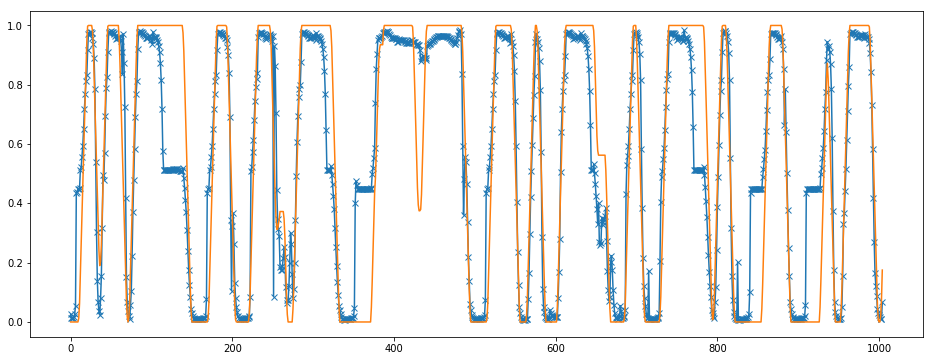

In [14]:
fig = plt.figure(figsize=(16,6))
plt.plot(trainY_predict, marker='x')
plt.plot(trainY_true)
# plt.xlim([300, 400])

In [15]:
numberTest = 230
testX = filteredSeries[numberTrain:numberTrain+numberTest]
testY = labels[numberTrain:numberTrain+numberTest]
testY_predict = estimator.predict(testX)
testY_true = estimator._transform_target(testY)

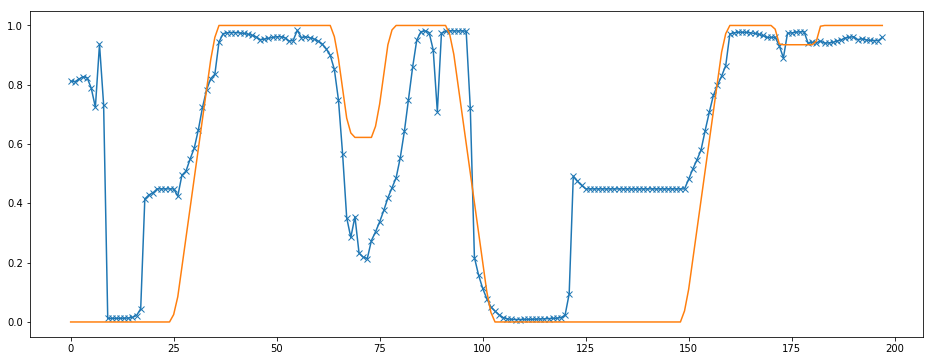

In [16]:
fig = plt.figure(figsize=(16,6))
plt.plot(testY_predict, marker='x')
plt.plot(testY_true)
# plt.plot(np.roll(y_test_true, -stepInFuture))
# plt.xlim([65, 80])

In [11]:
import pickle as pkl
pkl.dump(estimator, open('example_estimator_lstm.pkl', 'wb'))

In [12]:
import pickle as pkl
estimator_ld = pkl.load(open('example_estimator_lstm.pkl', 'rb')) 